In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd ## Used only to read data

In [2]:
# Loading dataset
data1 = pd.read_csv('datasets/energydata_complete.csv')

In [3]:
data2 = data1.drop(columns=['date'])
data = np.array(data2)
print(data.shape)

(19735, 28)


In [4]:
### Creating features and labels for train and test set
### 10% of total data used as test data

x_train1 = np.empty([int(data.shape[0]*0.9),data.shape[1]-1])
y_train1 = np.empty([int(data.shape[0]*0.9),1])
x_test1 = np.empty([data.shape[0]-int(data.shape[0]*0.9),data.shape[1]-1])
y_test1 = np.empty([data.shape[0]-int(data.shape[0]*0.9),1])

for i in range(0,data.shape[0]):
    for j in range(1,data.shape[1]):
        if(i<int(data.shape[0]*0.9)):
            x_train1[i,j-1] = data[i][j]
        else:
            x_test1[i-int(data.shape[0]*0.9),j-1] = data[i][j]

for i in range(0,data.shape[0]):
    if(i<int(data.shape[0]*0.9)):
        y_train1[i,0] = data[i][0]
    else:
        y_test1[i-int(data.shape[0]*0.9),0] = data[i][0]
print(x_train1.shape, x_test1.shape, y_train1.shape, y_test1.shape)

(17761, 27) (1974, 27) (17761, 1) (1974, 1)


In [5]:
# Normalization of train set
# print(x_train1)
x_train = np.empty(x_train1.shape)
m = []
v = []
for i in range(0,x_train1.shape[1]):
    mean = np.mean(x_train1[:,i])
    var = np.var(x_train1[:,i])
    m.append(mean)
    v.append(var)
    x_train[:,i] = x_train1[:,i] - mean*np.ones(x_train1[:,i].shape)
    x_train[:,i] = x_train[:,i]/var

y_test = y_test1
m1 = np.mean(y_train1)
v1 = np.var(x_train1)
y_train = np.empty(y_train1.shape)
y_train = y_train1 - m1*np.ones(y_train1.shape)
y_train = y_train/v1
# y_train = y_train1


In [6]:
# Training
epochs = 20000  ## Number of epochs
w = np.zeros([x_train.shape[1],1])
batch_size = 17761    ## Batch size
batch = int(x_train.shape[0]/batch_size)
lr = 0.9   ### Learning rate
loss = []
for i in range(0,epochs):
    for b in range(0,batch):
        y_pred = x_train[b:b+batch_size]@w 
        w = w - lr*x_train[b:b+batch_size].T@(y_pred - y_train[b:b+batch_size])/y_pred.shape[0] 
    y_pred = (x_train@w)
    l1 = np.mean((y_train-y_pred)**2)
    print("Epoch",i,"Loss",l1)
    loss.append(l1)

Epoch 0 Loss 2.859727990045252e-05
Epoch 1 Loss 2.8320800598030033e-05
Epoch 2 Loss 2.8088409933558943e-05
Epoch 3 Loss 2.7887684853000484e-05
Epoch 4 Loss 2.7710645100330275e-05
Epoch 5 Loss 2.7551873091610485e-05
Epoch 6 Loss 2.7407560320464547e-05
Epoch 7 Loss 2.7274967101630264e-05
Epoch 8 Loss 2.715208823508428e-05
Epoch 9 Loss 2.7037433434523545e-05
Epoch 10 Loss 2.6929877889143273e-05
Epoch 11 Loss 2.6828558484565104e-05
Epoch 12 Loss 2.6732800910994505e-05
Epoch 13 Loss 2.6642068120778377e-05
Epoch 14 Loss 2.655592371669103e-05
Epoch 15 Loss 2.6474005849236793e-05
Epoch 16 Loss 2.6396008538263994e-05
Epoch 17 Loss 2.6321668252423897e-05
Epoch 18 Loss 2.6250754219376102e-05
Epoch 19 Loss 2.618306138807318e-05
Epoch 20 Loss 2.6118405280174e-05
Epoch 21 Loss 2.605661819037322e-05
Epoch 22 Loss 2.5997546352761757e-05
Epoch 23 Loss 2.5941047801545096e-05
Epoch 24 Loss 2.5886990733107735e-05
Epoch 25 Loss 2.5835252232082567e-05
Epoch 26 Loss 2.5785717263507843e-05
Epoch 27 Loss 2.573

Epoch 270 Loss 2.436969168882374e-05
Epoch 271 Loss 2.4369048159063593e-05
Epoch 272 Loss 2.4368407454598142e-05
Epoch 273 Loss 2.4367769550163494e-05
Epoch 274 Loss 2.4367134420919846e-05
Epoch 275 Loss 2.4366502042441575e-05
Epoch 276 Loss 2.436587239070759e-05
Epoch 277 Loss 2.436524544209195e-05
Epoch 278 Loss 2.4364621173354747e-05
Epoch 279 Loss 2.436399956163323e-05
Epoch 280 Loss 2.4363380584433177e-05
Epoch 281 Loss 2.4362764219620496e-05
Epoch 282 Loss 2.4362150445413063e-05
Epoch 283 Loss 2.4361539240372735e-05
Epoch 284 Loss 2.4360930583397677e-05
Epoch 285 Loss 2.4360324453714804e-05
Epoch 286 Loss 2.435972083087243e-05
Epoch 287 Loss 2.435911969473318e-05
Epoch 288 Loss 2.435852102546702e-05
Epoch 289 Loss 2.43579248035445e-05
Epoch 290 Loss 2.43573310097302e-05
Epoch 291 Loss 2.4356739625076268e-05
Epoch 292 Loss 2.4356150630916247e-05
Epoch 293 Loss 2.4355564008858944e-05
Epoch 294 Loss 2.4354979740782543e-05
Epoch 295 Loss 2.4354397808828814e-05
Epoch 296 Loss 2.435381

Epoch 552 Loss 2.425447046551172e-05
Epoch 553 Loss 2.425421112356811e-05
Epoch 554 Loss 2.4253952472787242e-05
Epoch 555 Loss 2.4253694510732676e-05
Epoch 556 Loss 2.42534372349792e-05
Epoch 557 Loss 2.4253180643112752e-05
Epoch 558 Loss 2.425292473273039e-05
Epoch 559 Loss 2.425266950144015e-05
Epoch 560 Loss 2.425241494686104e-05
Epoch 561 Loss 2.425216106662293e-05
Epoch 562 Loss 2.425190785836652e-05
Epoch 563 Loss 2.425165531974323e-05
Epoch 564 Loss 2.425140344841515e-05
Epoch 565 Loss 2.4251152242054997e-05
Epoch 566 Loss 2.425090169834601e-05
Epoch 567 Loss 2.42506518149819e-05
Epoch 568 Loss 2.4250402589666794e-05
Epoch 569 Loss 2.4250154020115167e-05
Epoch 570 Loss 2.4249906104051756e-05
Epoch 571 Loss 2.424965883921153e-05
Epoch 572 Loss 2.4249412223339598e-05
Epoch 573 Loss 2.4249166254191177e-05
Epoch 574 Loss 2.4248920929531495e-05
Epoch 575 Loss 2.424867624713575e-05
Epoch 576 Loss 2.4248432204789064e-05
Epoch 577 Loss 2.4248188800286388e-05
Epoch 578 Loss 2.42479460314

Epoch 824 Loss 2.4203207103976894e-05
Epoch 825 Loss 2.420307229683826e-05
Epoch 826 Loss 2.420293778250916e-05
Epoch 827 Loss 2.4202803560150284e-05
Epoch 828 Loss 2.4202669628925222e-05
Epoch 829 Loss 2.420253598800045e-05
Epoch 830 Loss 2.4202402636545344e-05
Epoch 831 Loss 2.4202269573732118e-05
Epoch 832 Loss 2.4202136798735862e-05
Epoch 833 Loss 2.4202004310734505e-05
Epoch 834 Loss 2.4201872108908796e-05
Epoch 835 Loss 2.420174019244232e-05
Epoch 836 Loss 2.4201608560521472e-05
Epoch 837 Loss 2.420147721233543e-05
Epoch 838 Loss 2.4201346147076172e-05
Epoch 839 Loss 2.4201215363938435e-05
Epoch 840 Loss 2.4201084862119733e-05
Epoch 841 Loss 2.4200954640820335e-05
Epoch 842 Loss 2.4200824699243238e-05
Epoch 843 Loss 2.4200695036594178e-05
Epoch 844 Loss 2.4200565652081604e-05
Epoch 845 Loss 2.4200436544916676e-05
Epoch 846 Loss 2.420030771431326e-05
Epoch 847 Loss 2.4200179159487883e-05
Epoch 848 Loss 2.4200050879659778e-05
Epoch 849 Loss 2.4199922874050824e-05
Epoch 850 Loss 2.4

Epoch 1109 Loss 2.4174067601814902e-05
Epoch 1110 Loss 2.417399085212664e-05
Epoch 1111 Loss 2.417391423991082e-05
Epoch 1112 Loss 2.417383776483079e-05
Epoch 1113 Loss 2.4173761426550917e-05
Epoch 1114 Loss 2.4173685224736568e-05
Epoch 1115 Loss 2.4173609159054095e-05
Epoch 1116 Loss 2.4173533229170864e-05
Epoch 1117 Loss 2.4173457434755212e-05
Epoch 1118 Loss 2.4173381775476477e-05
Epoch 1119 Loss 2.417330625100497e-05
Epoch 1120 Loss 2.4173230861012003e-05
Epoch 1121 Loss 2.4173155605169836e-05
Epoch 1122 Loss 2.417308048315172e-05
Epoch 1123 Loss 2.4173005494631883e-05
Epoch 1124 Loss 2.4172930639285505e-05
Epoch 1125 Loss 2.4172855916788744e-05
Epoch 1126 Loss 2.4172781326818703e-05
Epoch 1127 Loss 2.4172706869053452e-05
Epoch 1128 Loss 2.4172632543172024e-05
Epoch 1129 Loss 2.4172558348854383e-05
Epoch 1130 Loss 2.4172484285781455e-05
Epoch 1131 Loss 2.417241035363511e-05
Epoch 1132 Loss 2.4172336552098146e-05
Epoch 1133 Loss 2.4172262880854317e-05
Epoch 1134 Loss 2.4172189339588

Epoch 1394 Loss 2.4156698595250635e-05
Epoch 1395 Loss 2.4156650477549016e-05
Epoch 1396 Loss 2.4156602431767215e-05
Epoch 1397 Loss 2.4156554457754273e-05
Epoch 1398 Loss 2.4156506555359623e-05
Epoch 1399 Loss 2.4156458724433087e-05
Epoch 1400 Loss 2.415641096482491e-05
Epoch 1401 Loss 2.4156363276385712e-05
Epoch 1402 Loss 2.4156315658966505e-05
Epoch 1403 Loss 2.41562681124187e-05
Epoch 1404 Loss 2.4156220636594105e-05
Epoch 1405 Loss 2.4156173231344915e-05
Epoch 1406 Loss 2.4156125896523716e-05
Epoch 1407 Loss 2.415607863198347e-05
Epoch 1408 Loss 2.415603143757754e-05
Epoch 1409 Loss 2.415598431315967e-05
Epoch 1410 Loss 2.415593725858399e-05
Epoch 1411 Loss 2.415589027370502e-05
Epoch 1412 Loss 2.4155843358377635e-05
Epoch 1413 Loss 2.4155796512457128e-05
Epoch 1414 Loss 2.415574973579915e-05
Epoch 1415 Loss 2.4155703028259738e-05
Epoch 1416 Loss 2.4155656389695298e-05
Epoch 1417 Loss 2.4155609819962622e-05
Epoch 1418 Loss 2.4155563318918877e-05
Epoch 1419 Loss 2.4155516886421595

Epoch 1675 Loss 2.414554109445425e-05
Epoch 1676 Loss 2.4145508445844302e-05
Epoch 1677 Loss 2.414547583882582e-05
Epoch 1678 Loss 2.414544327332381e-05
Epoch 1679 Loss 2.4145410749263446e-05
Epoch 1680 Loss 2.4145378266570092e-05
Epoch 1681 Loss 2.4145345825169282e-05
Epoch 1682 Loss 2.4145313424986716e-05
Epoch 1683 Loss 2.414528106594827e-05
Epoch 1684 Loss 2.4145248747979995e-05
Epoch 1685 Loss 2.4145216471008118e-05
Epoch 1686 Loss 2.4145184234959032e-05
Epoch 1687 Loss 2.414515203975929e-05
Epoch 1688 Loss 2.414511988533563e-05
Epoch 1689 Loss 2.4145087771614965e-05
Epoch 1690 Loss 2.4145055698524362e-05
Epoch 1691 Loss 2.4145023665991066e-05
Epoch 1692 Loss 2.4144991673942478e-05
Epoch 1693 Loss 2.4144959722306188e-05
Epoch 1694 Loss 2.4144927811009934e-05
Epoch 1695 Loss 2.414489593998164e-05
Epoch 1696 Loss 2.414486410914938e-05
Epoch 1697 Loss 2.4144832318441393e-05
Epoch 1698 Loss 2.4144800567786103e-05
Epoch 1699 Loss 2.414476885711208e-05
Epoch 1700 Loss 2.4144737186348072

Epoch 1962 Loss 2.413762720403589e-05
Epoch 1963 Loss 2.4137603980835315e-05
Epoch 1964 Loss 2.4137580783320595e-05
Epoch 1965 Loss 2.413755761145158e-05
Epoch 1966 Loss 2.4137534465188198e-05
Epoch 1967 Loss 2.4137511344490465e-05
Epoch 1968 Loss 2.413748824931847e-05
Epoch 1969 Loss 2.4137465179632393e-05
Epoch 1970 Loss 2.4137442135392482e-05
Epoch 1971 Loss 2.4137419116559075e-05
Epoch 1972 Loss 2.4137396123092582e-05
Epoch 1973 Loss 2.41373731549535e-05
Epoch 1974 Loss 2.4137350212102397e-05
Epoch 1975 Loss 2.413732729449993e-05
Epoch 1976 Loss 2.4137304402106833e-05
Epoch 1977 Loss 2.4137281534883916e-05
Epoch 1978 Loss 2.413725869279206e-05
Epoch 1979 Loss 2.4137235875792242e-05
Epoch 1980 Loss 2.4137213083845507e-05
Epoch 1981 Loss 2.4137190316912975e-05
Epoch 1982 Loss 2.4137167574955847e-05
Epoch 1983 Loss 2.4137144857935407e-05
Epoch 1984 Loss 2.413712216581302e-05
Epoch 1985 Loss 2.4137099498550108e-05
Epoch 1986 Loss 2.4137076856108194e-05
Epoch 1987 Loss 2.413705423844886

Epoch 2244 Loss 2.413196583204444e-05
Epoch 2245 Loss 2.4131948516169267e-05
Epoch 2246 Loss 2.413193121724564e-05
Epoch 2247 Loss 2.4131913935249973e-05
Epoch 2248 Loss 2.4131896670158723e-05
Epoch 2249 Loss 2.4131879421948376e-05
Epoch 2250 Loss 2.4131862190595482e-05
Epoch 2251 Loss 2.4131844976076603e-05
Epoch 2252 Loss 2.4131827778368373e-05
Epoch 2253 Loss 2.4131810597447438e-05
Epoch 2254 Loss 2.413179343329051e-05
Epoch 2255 Loss 2.413177628587432e-05
Epoch 2256 Loss 2.4131759155175656e-05
Epoch 2257 Loss 2.4131742041171337e-05
Epoch 2258 Loss 2.413172494383823e-05
Epoch 2259 Loss 2.4131707863153228e-05
Epoch 2260 Loss 2.413169079909329e-05
Epoch 2261 Loss 2.413167375163538e-05
Epoch 2262 Loss 2.4131656720756545e-05
Epoch 2263 Loss 2.413163970643383e-05
Epoch 2264 Loss 2.413162270864435e-05
Epoch 2265 Loss 2.4131605727365235e-05
Epoch 2266 Loss 2.413158876257368e-05
Epoch 2267 Loss 2.4131571814246906e-05
Epoch 2268 Loss 2.413155488236218e-05
Epoch 2269 Loss 2.4131537966896792e-

Epoch 2524 Loss 2.4127703371905985e-05
Epoch 2525 Loss 2.4127690010755277e-05
Epoch 2526 Loss 2.4127676661286507e-05
Epoch 2527 Loss 2.4127663323484798e-05
Epoch 2528 Loss 2.4127649997335305e-05
Epoch 2529 Loss 2.4127636682823204e-05
Epoch 2530 Loss 2.4127623379933693e-05
Epoch 2531 Loss 2.412761008865198e-05
Epoch 2532 Loss 2.412759680896332e-05
Epoch 2533 Loss 2.4127583540852972e-05
Epoch 2534 Loss 2.412757028430623e-05
Epoch 2535 Loss 2.41275570393084e-05
Epoch 2536 Loss 2.4127543805844815e-05
Epoch 2537 Loss 2.412753058390083e-05
Epoch 2538 Loss 2.4127517373461826e-05
Epoch 2539 Loss 2.412750417451321e-05
Epoch 2540 Loss 2.412749098704039e-05
Epoch 2541 Loss 2.412747781102883e-05
Epoch 2542 Loss 2.412746464646398e-05
Epoch 2543 Loss 2.4127451493331347e-05
Epoch 2544 Loss 2.4127438351616434e-05
Epoch 2545 Loss 2.4127425221304783e-05
Epoch 2546 Loss 2.412741210238194e-05
Epoch 2547 Loss 2.41273989948335e-05
Epoch 2548 Loss 2.4127385898645054e-05
Epoch 2549 Loss 2.412737281380223e-05


Epoch 2809 Loss 2.412431701640853e-05
Epoch 2810 Loss 2.412430645992682e-05
Epoch 2811 Loss 2.4124295911673337e-05
Epoch 2812 Loss 2.4124285371638295e-05
Epoch 2813 Loss 2.4124274839811928e-05
Epoch 2814 Loss 2.412426431618447e-05
Epoch 2815 Loss 2.4124253800746175e-05
Epoch 2816 Loss 2.4124243293487314e-05
Epoch 2817 Loss 2.412423279439817e-05
Epoch 2818 Loss 2.4124222303469034e-05
Epoch 2819 Loss 2.4124211820690214e-05
Epoch 2820 Loss 2.412420134605204e-05
Epoch 2821 Loss 2.4124190879544834e-05
Epoch 2822 Loss 2.412418042115896e-05
Epoch 2823 Loss 2.412416997088477e-05
Epoch 2824 Loss 2.4124159528712643e-05
Epoch 2825 Loss 2.412414909463297e-05
Epoch 2826 Loss 2.412413866863615e-05
Epoch 2827 Loss 2.41241282507126e-05
Epoch 2828 Loss 2.412411784085275e-05
Epoch 2829 Loss 2.4124107439047047e-05
Epoch 2830 Loss 2.412409704528594e-05
Epoch 2831 Loss 2.41240866595599e-05
Epoch 2832 Loss 2.4124076281859415e-05
Epoch 2833 Loss 2.412406591217497e-05
Epoch 2834 Loss 2.4124055550497082e-05
Ep

Epoch 3098 Loss 2.4121573204947335e-05
Epoch 3099 Loss 2.412156466767299e-05
Epoch 3100 Loss 2.412155613628728e-05
Epoch 3101 Loss 2.412154761078355e-05
Epoch 3102 Loss 2.4121539091155195e-05
Epoch 3103 Loss 2.412153057739559e-05
Epoch 3104 Loss 2.4121522069498118e-05
Epoch 3105 Loss 2.412151356745618e-05
Epoch 3106 Loss 2.4121505071263185e-05
Epoch 3107 Loss 2.4121496580912548e-05
Epoch 3108 Loss 2.4121488096397692e-05
Epoch 3109 Loss 2.4121479617712053e-05
Epoch 3110 Loss 2.4121471144849068e-05
Epoch 3111 Loss 2.412146267780219e-05
Epoch 3112 Loss 2.4121454216564875e-05
Epoch 3113 Loss 2.4121445761130588e-05
Epoch 3114 Loss 2.4121437311492813e-05
Epoch 3115 Loss 2.412142886764502e-05
Epoch 3116 Loss 2.4121420429580705e-05
Epoch 3117 Loss 2.4121411997293373e-05
Epoch 3118 Loss 2.4121403570776537e-05
Epoch 3119 Loss 2.4121395150023706e-05
Epoch 3120 Loss 2.41213867350284e-05
Epoch 3121 Loss 2.4121378325784168e-05
Epoch 3122 Loss 2.412136992228454e-05
Epoch 3123 Loss 2.4121361524523078e

Epoch 3386 Loss 2.4119333916677702e-05
Epoch 3387 Loss 2.411932683170499e-05
Epoch 3388 Loss 2.4119319751020458e-05
Epoch 3389 Loss 2.4119312674619493e-05
Epoch 3390 Loss 2.4119305602497485e-05
Epoch 3391 Loss 2.411929853464985e-05
Epoch 3392 Loss 2.4119291471071973e-05
Epoch 3393 Loss 2.4119284411759278e-05
Epoch 3394 Loss 2.4119277356707185e-05
Epoch 3395 Loss 2.411927030591111e-05
Epoch 3396 Loss 2.4119263259366493e-05
Epoch 3397 Loss 2.4119256217068755e-05
Epoch 3398 Loss 2.4119249179013348e-05
Epoch 3399 Loss 2.4119242145195704e-05
Epoch 3400 Loss 2.411923511561129e-05
Epoch 3401 Loss 2.411922809025555e-05
Epoch 3402 Loss 2.411922106912396e-05
Epoch 3403 Loss 2.411921405221197e-05
Epoch 3404 Loss 2.4119207039515077e-05
Epoch 3405 Loss 2.411920003102874e-05
Epoch 3406 Loss 2.4119193026748452e-05
Epoch 3407 Loss 2.4119186026669703e-05
Epoch 3408 Loss 2.411917903078799e-05
Epoch 3409 Loss 2.4119172039098815e-05
Epoch 3410 Loss 2.4119165051597688e-05
Epoch 3411 Loss 2.411915806828011e

Epoch 3619 Loss 2.4117790063906204e-05
Epoch 3620 Loss 2.4117783864433242e-05
Epoch 3621 Loss 2.4117777668313093e-05
Epoch 3622 Loss 2.4117771475542296e-05
Epoch 3623 Loss 2.4117765286117385e-05
Epoch 3624 Loss 2.4117759100034892e-05
Epoch 3625 Loss 2.4117752917291352e-05
Epoch 3626 Loss 2.4117746737883323e-05
Epoch 3627 Loss 2.4117740561807342e-05
Epoch 3628 Loss 2.4117734389059967e-05
Epoch 3629 Loss 2.4117728219637755e-05
Epoch 3630 Loss 2.411772205353726e-05
Epoch 3631 Loss 2.411771589075506e-05
Epoch 3632 Loss 2.4117709731287717e-05
Epoch 3633 Loss 2.4117703575131796e-05
Epoch 3634 Loss 2.4117697422283888e-05
Epoch 3635 Loss 2.411769127274057e-05
Epoch 3636 Loss 2.411768512649843e-05
Epoch 3637 Loss 2.411767898355405e-05
Epoch 3638 Loss 2.4117672843904033e-05
Epoch 3639 Loss 2.4117666707544972e-05
Epoch 3640 Loss 2.4117660574473468e-05
Epoch 3641 Loss 2.411765444468613e-05
Epoch 3642 Loss 2.4117648318179567e-05
Epoch 3643 Loss 2.411764219495039e-05
Epoch 3644 Loss 2.41176360749952

Epoch 3838 Loss 2.4116506787214235e-05
Epoch 3839 Loss 2.4116501245846324e-05
Epoch 3840 Loss 2.411649570716165e-05
Epoch 3841 Loss 2.411649017115755e-05
Epoch 3842 Loss 2.4116484637831332e-05
Epoch 3843 Loss 2.411647910718034e-05
Epoch 3844 Loss 2.4116473579201907e-05
Epoch 3845 Loss 2.411646805389336e-05
Epoch 3846 Loss 2.4116462531252046e-05
Epoch 3847 Loss 2.4116457011275304e-05
Epoch 3848 Loss 2.4116451493960485e-05
Epoch 3849 Loss 2.4116445979304933e-05
Epoch 3850 Loss 2.4116440467306005e-05
Epoch 3851 Loss 2.411643495796105e-05
Epoch 3852 Loss 2.4116429451267432e-05
Epoch 3853 Loss 2.4116423947222506e-05
Epoch 3854 Loss 2.4116418445823643e-05
Epoch 3855 Loss 2.4116412947068204e-05
Epoch 3856 Loss 2.4116407450953566e-05
Epoch 3857 Loss 2.41164019574771e-05
Epoch 3858 Loss 2.4116396466636184e-05
Epoch 3859 Loss 2.4116390978428196e-05
Epoch 3860 Loss 2.411638549285052e-05
Epoch 3861 Loss 2.4116380009900538e-05
Epoch 3862 Loss 2.4116374529575645e-05
Epoch 3863 Loss 2.411636905187323

Epoch 4094 Loss 2.4115168900077167e-05
Epoch 4095 Loss 2.4115163966328503e-05
Epoch 4096 Loss 2.4115159034670766e-05
Epoch 4097 Loss 2.4115154105101962e-05
Epoch 4098 Loss 2.411514917762012e-05
Epoch 4099 Loss 2.4115144252223246e-05
Epoch 4100 Loss 2.411513932890937e-05
Epoch 4101 Loss 2.4115134407676512e-05
Epoch 4102 Loss 2.41151294885227e-05
Epoch 4103 Loss 2.4115124571445965e-05
Epoch 4104 Loss 2.4115119656444335e-05
Epoch 4105 Loss 2.4115114743515852e-05
Epoch 4106 Loss 2.4115109832658534e-05
Epoch 4107 Loss 2.4115104923870433e-05
Epoch 4108 Loss 2.411510001714958e-05
Epoch 4109 Loss 2.411509511249403e-05
Epoch 4110 Loss 2.4115090209901813e-05
Epoch 4111 Loss 2.4115085309370986e-05
Epoch 4112 Loss 2.411508041089959e-05
Epoch 4113 Loss 2.4115075514485685e-05
Epoch 4114 Loss 2.411507062012732e-05
Epoch 4115 Loss 2.411506572782255e-05
Epoch 4116 Loss 2.4115060837569434e-05
Epoch 4117 Loss 2.4115055949366036e-05
Epoch 4118 Loss 2.411505106321041e-05
Epoch 4119 Loss 2.411504617910063e-

Epoch 4359 Loss 2.4113928943006798e-05
Epoch 4360 Loss 2.411392450042667e-05
Epoch 4361 Loss 2.4113920059483805e-05
Epoch 4362 Loss 2.411391562017673e-05
Epoch 4363 Loss 2.4113911182503975e-05
Epoch 4364 Loss 2.4113906746464098e-05
Epoch 4365 Loss 2.4113902312055623e-05
Epoch 4366 Loss 2.41138978792771e-05
Epoch 4367 Loss 2.411389344812707e-05
Epoch 4368 Loss 2.411388901860408e-05
Epoch 4369 Loss 2.411388459070667e-05
Epoch 4370 Loss 2.4113880164433396e-05
Epoch 4371 Loss 2.411387573978281e-05
Epoch 4372 Loss 2.411387131675346e-05
Epoch 4373 Loss 2.4113866895343898e-05
Epoch 4374 Loss 2.4113862475552685e-05
Epoch 4375 Loss 2.411385805737837e-05
Epoch 4376 Loss 2.4113853640819515e-05
Epoch 4377 Loss 2.4113849225874685e-05
Epoch 4378 Loss 2.4113844812542433e-05
Epoch 4379 Loss 2.4113840400821333e-05
Epoch 4380 Loss 2.4113835990709937e-05
Epoch 4381 Loss 2.4113831582206823e-05
Epoch 4382 Loss 2.4113827175310558e-05
Epoch 4383 Loss 2.411382277001971e-05
Epoch 4384 Loss 2.411381836633284e-0

Epoch 4609 Loss 2.4112865739000913e-05
Epoch 4610 Loss 2.4112861664137176e-05
Epoch 4611 Loss 2.411285759059164e-05
Epoch 4612 Loss 2.4112853518363207e-05
Epoch 4613 Loss 2.4112849447450753e-05
Epoch 4614 Loss 2.4112845377853202e-05
Epoch 4615 Loss 2.4112841309569437e-05
Epoch 4616 Loss 2.4112837242598366e-05
Epoch 4617 Loss 2.4112833176938892e-05
Epoch 4618 Loss 2.411282911258991e-05
Epoch 4619 Loss 2.411282504955033e-05
Epoch 4620 Loss 2.411282098781906e-05
Epoch 4621 Loss 2.4112816927395e-05
Epoch 4622 Loss 2.4112812868277066e-05
Epoch 4623 Loss 2.411280881046416e-05
Epoch 4624 Loss 2.4112804753955195e-05
Epoch 4625 Loss 2.4112800698749087e-05
Epoch 4626 Loss 2.4112796644844742e-05
Epoch 4627 Loss 2.411279259224108e-05
Epoch 4628 Loss 2.4112788540937013e-05
Epoch 4629 Loss 2.411278449093146e-05
Epoch 4630 Loss 2.4112780442223334e-05
Epoch 4631 Loss 2.4112776394811562e-05
Epoch 4632 Loss 2.411277234869506e-05
Epoch 4633 Loss 2.4112768303872748e-05
Epoch 4634 Loss 2.4112764260343544e-

Epoch 4860 Loss 2.4111881619869075e-05
Epoch 4861 Loss 2.4111877844228115e-05
Epoch 4862 Loss 2.411187406966348e-05
Epoch 4863 Loss 2.411187029617433e-05
Epoch 4864 Loss 2.4111866523759834e-05
Epoch 4865 Loss 2.411186275241916e-05
Epoch 4866 Loss 2.4111858982151474e-05
Epoch 4867 Loss 2.411185521295594e-05
Epoch 4868 Loss 2.4111851444831734e-05
Epoch 4869 Loss 2.4111847677778024e-05
Epoch 4870 Loss 2.411184391179398e-05
Epoch 4871 Loss 2.4111840146878777e-05
Epoch 4872 Loss 2.4111836383031585e-05
Epoch 4873 Loss 2.4111832620251578e-05
Epoch 4874 Loss 2.4111828858537933e-05
Epoch 4875 Loss 2.4111825097889826e-05
Epoch 4876 Loss 2.411182133830643e-05
Epoch 4877 Loss 2.4111817579786922e-05
Epoch 4878 Loss 2.4111813822330486e-05
Epoch 4879 Loss 2.4111810065936296e-05
Epoch 4880 Loss 2.4111806310603538e-05
Epoch 4881 Loss 2.4111802556331386e-05
Epoch 4882 Loss 2.4111798803119032e-05
Epoch 4883 Loss 2.4111795050965645e-05
Epoch 4884 Loss 2.4111791299870423e-05
Epoch 4885 Loss 2.4111787549832

Epoch 5084 Loss 2.411106130419302e-05
Epoch 5085 Loss 2.4111057750384387e-05
Epoch 5086 Loss 2.4111054197486112e-05
Epoch 5087 Loss 2.4111050645497534e-05
Epoch 5088 Loss 2.4111047094418002e-05
Epoch 5089 Loss 2.4111043544246872e-05
Epoch 5090 Loss 2.411103999498348e-05
Epoch 5091 Loss 2.4111036446627187e-05
Epoch 5092 Loss 2.4111032899177333e-05
Epoch 5093 Loss 2.411102935263327e-05
Epoch 5094 Loss 2.4111025806994352e-05
Epoch 5095 Loss 2.4111022262259934e-05
Epoch 5096 Loss 2.4111018718429364e-05
Epoch 5097 Loss 2.4111015175501992e-05
Epoch 5098 Loss 2.411101163347718e-05
Epoch 5099 Loss 2.411100809235428e-05
Epoch 5100 Loss 2.4111004552132644e-05
Epoch 5101 Loss 2.411100101281163e-05
Epoch 5102 Loss 2.4110997474390602e-05
Epoch 5103 Loss 2.4110993936868903e-05
Epoch 5104 Loss 2.4110990400245903e-05
Epoch 5105 Loss 2.4110986864520954e-05
Epoch 5106 Loss 2.411098332969342e-05
Epoch 5107 Loss 2.4110979795762666e-05
Epoch 5108 Loss 2.411097626272804e-05
Epoch 5109 Loss 2.411097273058891

Epoch 5355 Loss 2.411012952938933e-05
Epoch 5356 Loss 2.4110126200524082e-05
Epoch 5357 Loss 2.4110122872415447e-05
Epoch 5358 Loss 2.4110119545062937e-05
Epoch 5359 Loss 2.4110116218466065e-05
Epoch 5360 Loss 2.411011289262433e-05
Epoch 5361 Loss 2.411010956753726e-05
Epoch 5362 Loss 2.4110106243204363e-05
Epoch 5363 Loss 2.411010291962515e-05
Epoch 5364 Loss 2.4110099596799132e-05
Epoch 5365 Loss 2.4110096274725833e-05
Epoch 5366 Loss 2.411009295340476e-05
Epoch 5367 Loss 2.4110089632835436e-05
Epoch 5368 Loss 2.4110086313017373e-05
Epoch 5369 Loss 2.411008299395009e-05
Epoch 5370 Loss 2.41100796756331e-05
Epoch 5371 Loss 2.4110076358065925e-05
Epoch 5372 Loss 2.4110073041248083e-05
Epoch 5373 Loss 2.4110069725179086e-05
Epoch 5374 Loss 2.4110066409858462e-05
Epoch 5375 Loss 2.4110063095285728e-05
Epoch 5376 Loss 2.4110059781460406e-05
Epoch 5377 Loss 2.4110056468382e-05
Epoch 5378 Loss 2.4110053156050062e-05
Epoch 5379 Loss 2.4110049844464088e-05
Epoch 5380 Loss 2.4110046533623615e-

Epoch 5582 Loss 2.4109392397144982e-05
Epoch 5583 Loss 2.4109389228422397e-05
Epoch 5584 Loss 2.410938606035761e-05
Epoch 5585 Loss 2.410938289295025e-05
Epoch 5586 Loss 2.4109379726199925e-05
Epoch 5587 Loss 2.410937656010625e-05
Epoch 5588 Loss 2.410937339466885e-05
Epoch 5589 Loss 2.4109370229887325e-05
Epoch 5590 Loss 2.4109367065761303e-05
Epoch 5591 Loss 2.4109363902290397e-05
Epoch 5592 Loss 2.4109360739474224e-05
Epoch 5593 Loss 2.4109357577312404e-05
Epoch 5594 Loss 2.410935441580455e-05
Epoch 5595 Loss 2.4109351254950286e-05
Epoch 5596 Loss 2.410934809474923e-05
Epoch 5597 Loss 2.4109344935200993e-05
Epoch 5598 Loss 2.4109341776305203e-05
Epoch 5599 Loss 2.4109338618061477e-05
Epoch 5600 Loss 2.4109335460469437e-05
Epoch 5601 Loss 2.41093323035287e-05
Epoch 5602 Loss 2.4109329147238893e-05
Epoch 5603 Loss 2.4109325991599636e-05
Epoch 5604 Loss 2.4109322836610542e-05
Epoch 5605 Loss 2.410931968227125e-05
Epoch 5606 Loss 2.4109316528581367e-05
Epoch 5607 Loss 2.410931337554052e

Epoch 5810 Loss 2.4108686240813903e-05
Epoch 5811 Loss 2.4108683212819717e-05
Epoch 5812 Loss 2.4108680185404874e-05
Epoch 5813 Loss 2.4108677158569063e-05
Epoch 5814 Loss 2.410867413231198e-05
Epoch 5815 Loss 2.4108671106633322e-05
Epoch 5816 Loss 2.4108668081532784e-05
Epoch 5817 Loss 2.410866505701006e-05
Epoch 5818 Loss 2.4108662033064844e-05
Epoch 5819 Loss 2.4108659009696826e-05
Epoch 5820 Loss 2.410865598690572e-05
Epoch 5821 Loss 2.410865296469121e-05
Epoch 5822 Loss 2.4108649943052994e-05
Epoch 5823 Loss 2.4108646921990766e-05
Epoch 5824 Loss 2.410864390150424e-05
Epoch 5825 Loss 2.4108640881593085e-05
Epoch 5826 Loss 2.410863786225703e-05
Epoch 5827 Loss 2.4108634843495752e-05
Epoch 5828 Loss 2.410863182530896e-05
Epoch 5829 Loss 2.4108628807696352e-05
Epoch 5830 Loss 2.4108625790657622e-05
Epoch 5831 Loss 2.4108622774192476e-05
Epoch 5832 Loss 2.4108619758300612e-05
Epoch 5833 Loss 2.4108616742981728e-05
Epoch 5834 Loss 2.4108613728235523e-05
Epoch 5835 Loss 2.41086107140617

Epoch 6075 Loss 2.4107903207855815e-05
Epoch 6076 Loss 2.4107900323561826e-05
Epoch 6077 Loss 2.410789743977585e-05
Epoch 6078 Loss 2.4107894556497645e-05
Epoch 6079 Loss 2.4107891673726976e-05
Epoch 6080 Loss 2.410788879146362e-05
Epoch 6081 Loss 2.4107885909707326e-05
Epoch 6082 Loss 2.4107883028457868e-05
Epoch 6083 Loss 2.4107880147715006e-05
Epoch 6084 Loss 2.4107877267478514e-05
Epoch 6085 Loss 2.4107874387748155e-05
Epoch 6086 Loss 2.4107871508523684e-05
Epoch 6087 Loss 2.410786862980488e-05
Epoch 6088 Loss 2.4107865751591505e-05
Epoch 6089 Loss 2.410786287388333e-05
Epoch 6090 Loss 2.4107859996680113e-05
Epoch 6091 Loss 2.410785711998163e-05
Epoch 6092 Loss 2.4107854243787643e-05
Epoch 6093 Loss 2.410785136809792e-05
Epoch 6094 Loss 2.410784849291223e-05
Epoch 6095 Loss 2.4107845618230344e-05
Epoch 6096 Loss 2.4107842744052028e-05
Epoch 6097 Loss 2.4107839870377046e-05
Epoch 6098 Loss 2.410783699720517e-05
Epoch 6099 Loss 2.410783412453617e-05
Epoch 6100 Loss 2.410783125236982e

Epoch 6352 Loss 2.4107122902538706e-05
Epoch 6353 Loss 2.4107120150685304e-05
Epoch 6354 Loss 2.4107117399282415e-05
Epoch 6355 Loss 2.4107114648329856e-05
Epoch 6356 Loss 2.4107111897827445e-05
Epoch 6357 Loss 2.4107109147775004e-05
Epoch 6358 Loss 2.410710639817235e-05
Epoch 6359 Loss 2.41071036490193e-05
Epoch 6360 Loss 2.410710090031567e-05
Epoch 6361 Loss 2.4107098152061282e-05
Epoch 6362 Loss 2.410709540425596e-05
Epoch 6363 Loss 2.4107092656899516e-05
Epoch 6364 Loss 2.410708990999177e-05
Epoch 6365 Loss 2.410708716353255e-05
Epoch 6366 Loss 2.4107084417521667e-05
Epoch 6367 Loss 2.410708167195894e-05
Epoch 6368 Loss 2.41070789268442e-05
Epoch 6369 Loss 2.4107076182177257e-05
Epoch 6370 Loss 2.4107073437957936e-05
Epoch 6371 Loss 2.410707069418605e-05
Epoch 6372 Loss 2.4107067950861434e-05
Epoch 6373 Loss 2.41070652079839e-05
Epoch 6374 Loss 2.410706246555327e-05
Epoch 6375 Loss 2.4107059723569363e-05
Epoch 6376 Loss 2.4107056982032003e-05
Epoch 6377 Loss 2.4107054240941015e-05


Epoch 6594 Loss 2.4106469688752856e-05
Epoch 6595 Loss 2.4106467040978058e-05
Epoch 6596 Loss 2.410646439361415e-05
Epoch 6597 Loss 2.4106461746660983e-05
Epoch 6598 Loss 2.410645910011841e-05
Epoch 6599 Loss 2.4106456453986295e-05
Epoch 6600 Loss 2.4106453808264478e-05
Epoch 6601 Loss 2.410645116295282e-05
Epoch 6602 Loss 2.4106448518051173e-05
Epoch 6603 Loss 2.4106445873559393e-05
Epoch 6604 Loss 2.4106443229477324e-05
Epoch 6605 Loss 2.4106440585804835e-05
Epoch 6606 Loss 2.4106437942541768e-05
Epoch 6607 Loss 2.4106435299687984e-05
Epoch 6608 Loss 2.4106432657243334e-05
Epoch 6609 Loss 2.4106430015207676e-05
Epoch 6610 Loss 2.4106427373580863e-05
Epoch 6611 Loss 2.410642473236275e-05
Epoch 6612 Loss 2.410642209155319e-05
Epoch 6613 Loss 2.410641945115204e-05
Epoch 6614 Loss 2.4106416811159158e-05
Epoch 6615 Loss 2.4106414171574396e-05
Epoch 6616 Loss 2.4106411532397606e-05
Epoch 6617 Loss 2.410640889362865e-05
Epoch 6618 Loss 2.4106406255267378e-05
Epoch 6619 Loss 2.41064036173136

Epoch 6813 Loss 2.4105899391973444e-05
Epoch 6814 Loss 2.4105896830881816e-05
Epoch 6815 Loss 2.4105894270171685e-05
Epoch 6816 Loss 2.410589170984293e-05
Epoch 6817 Loss 2.4105889149895425e-05
Epoch 6818 Loss 2.410588659032905e-05
Epoch 6819 Loss 2.410588403114369e-05
Epoch 6820 Loss 2.410588147233921e-05
Epoch 6821 Loss 2.4105878913915494e-05
Epoch 6822 Loss 2.410587635587242e-05
Epoch 6823 Loss 2.4105873798209872e-05
Epoch 6824 Loss 2.410587124092772e-05
Epoch 6825 Loss 2.4105868684025846e-05
Epoch 6826 Loss 2.410586612750413e-05
Epoch 6827 Loss 2.410586357136245e-05
Epoch 6828 Loss 2.4105861015600682e-05
Epoch 6829 Loss 2.4105858460218707e-05
Epoch 6830 Loss 2.4105855905216402e-05
Epoch 6831 Loss 2.4105853350593656e-05
Epoch 6832 Loss 2.4105850796350333e-05
Epoch 6833 Loss 2.4105848242486322e-05
Epoch 6834 Loss 2.4105845689001497e-05
Epoch 6835 Loss 2.4105843135895747e-05
Epoch 6836 Loss 2.4105840583168935e-05
Epoch 6837 Loss 2.410583803082096e-05
Epoch 6838 Loss 2.4105835478851687

Epoch 7071 Loss 2.410525094876283e-05
Epoch 7072 Loss 2.410524848230132e-05
Epoch 7073 Loss 2.4105246016192732e-05
Epoch 7074 Loss 2.4105243550436953e-05
Epoch 7075 Loss 2.410524108503389e-05
Epoch 7076 Loss 2.4105238619983443e-05
Epoch 7077 Loss 2.4105236155285506e-05
Epoch 7078 Loss 2.4105233690939992e-05
Epoch 7079 Loss 2.4105231226946787e-05
Epoch 7080 Loss 2.4105228763305798e-05
Epoch 7081 Loss 2.4105226300016927e-05
Epoch 7082 Loss 2.410522383708007e-05
Epoch 7083 Loss 2.4105221374495128e-05
Epoch 7084 Loss 2.4105218912262003e-05
Epoch 7085 Loss 2.41052164503806e-05
Epoch 7086 Loss 2.4105213988850813e-05
Epoch 7087 Loss 2.4105211527672545e-05
Epoch 7088 Loss 2.4105209066845698e-05
Epoch 7089 Loss 2.4105206606370173e-05
Epoch 7090 Loss 2.410520414624587e-05
Epoch 7091 Loss 2.410520168647269e-05
Epoch 7092 Loss 2.4105199227050537e-05
Epoch 7093 Loss 2.4105196767979305e-05
Epoch 7094 Loss 2.4105194309258903e-05
Epoch 7095 Loss 2.410519185088923e-05
Epoch 7096 Loss 2.4105189392870185

Epoch 7312 Loss 2.410466651684673e-05
Epoch 7313 Loss 2.4104664132703145e-05
Epoch 7314 Loss 2.410466174889033e-05
Epoch 7315 Loss 2.4104659365408195e-05
Epoch 7316 Loss 2.4104656982256654e-05
Epoch 7317 Loss 2.4104654599435632e-05
Epoch 7318 Loss 2.4104652216945035e-05
Epoch 7319 Loss 2.4104649834784787e-05
Epoch 7320 Loss 2.41046474529548e-05
Epoch 7321 Loss 2.4104645071454987e-05
Epoch 7322 Loss 2.4104642690285277e-05
Epoch 7323 Loss 2.4104640309445566e-05
Epoch 7324 Loss 2.4104637928935786e-05
Epoch 7325 Loss 2.410463554875585e-05
Epoch 7326 Loss 2.410463316890567e-05
Epoch 7327 Loss 2.410463078938517e-05
Epoch 7328 Loss 2.4104628410194258e-05
Epoch 7329 Loss 2.410462603133285e-05
Epoch 7330 Loss 2.410462365280087e-05
Epoch 7331 Loss 2.410462127459824e-05
Epoch 7332 Loss 2.410461889672486e-05
Epoch 7333 Loss 2.4104616519180656e-05
Epoch 7334 Loss 2.4104614141965542e-05
Epoch 7335 Loss 2.410461176507944e-05
Epoch 7336 Loss 2.410460938852226e-05
Epoch 7337 Loss 2.4104607012293926e-05

Epoch 7573 Loss 2.410405524172814e-05
Epoch 7574 Loss 2.4104052941213044e-05
Epoch 7575 Loss 2.41040506410085e-05
Epoch 7576 Loss 2.4104048341114455e-05
Epoch 7577 Loss 2.4104046041530826e-05
Epoch 7578 Loss 2.4104043742257536e-05
Epoch 7579 Loss 2.410404144329453e-05
Epoch 7580 Loss 2.4104039144641726e-05
Epoch 7581 Loss 2.4104036846299058e-05
Epoch 7582 Loss 2.410403454826645e-05
Epoch 7583 Loss 2.4104032250543837e-05
Epoch 7584 Loss 2.410402995313115e-05
Epoch 7585 Loss 2.4104027656028304e-05
Epoch 7586 Loss 2.4104025359235245e-05
Epoch 7587 Loss 2.410402306275189e-05
Epoch 7588 Loss 2.4104020766578176e-05
Epoch 7589 Loss 2.4104018470714035e-05
Epoch 7590 Loss 2.410401617515939e-05
Epoch 7591 Loss 2.4104013879914167e-05
Epoch 7592 Loss 2.410401158497831e-05
Epoch 7593 Loss 2.4104009290351733e-05
Epoch 7594 Loss 2.4104006996034375e-05
Epoch 7595 Loss 2.410400470202616e-05
Epoch 7596 Loss 2.410400240832703e-05
Epoch 7597 Loss 2.4104000114936894e-05
Epoch 7598 Loss 2.41039978218557e-05

Epoch 7843 Loss 2.4103445158963788e-05
Epoch 7844 Loss 2.4103442939850786e-05
Epoch 7845 Loss 2.4103440721030596e-05
Epoch 7846 Loss 2.4103438502503168e-05
Epoch 7847 Loss 2.4103436284268437e-05
Epoch 7848 Loss 2.410343406632634e-05
Epoch 7849 Loss 2.4103431848676816e-05
Epoch 7850 Loss 2.4103429631319815e-05
Epoch 7851 Loss 2.4103427414255264e-05
Epoch 7852 Loss 2.4103425197483105e-05
Epoch 7853 Loss 2.410342298100328e-05
Epoch 7854 Loss 2.4103420764815733e-05
Epoch 7855 Loss 2.41034185489204e-05
Epoch 7856 Loss 2.410341633331721e-05
Epoch 7857 Loss 2.4103414118006118e-05
Epoch 7858 Loss 2.410341190298706e-05
Epoch 7859 Loss 2.410340968825997e-05
Epoch 7860 Loss 2.4103407473824792e-05
Epoch 7861 Loss 2.4103405259681464e-05
Epoch 7862 Loss 2.410340304582993e-05
Epoch 7863 Loss 2.4103400832270126e-05
Epoch 7864 Loss 2.4103398619001986e-05
Epoch 7865 Loss 2.410339640602546e-05
Epoch 7866 Loss 2.4103394193340485e-05
Epoch 7867 Loss 2.4103391980947e-05
Epoch 7868 Loss 2.4103389768844942e-0

Epoch 8116 Loss 2.4102850016327837e-05
Epoch 8117 Loss 2.410284787500389e-05
Epoch 8118 Loss 2.4102845733957314e-05
Epoch 8119 Loss 2.410284359318806e-05
Epoch 8120 Loss 2.4102841452696072e-05
Epoch 8121 Loss 2.4102839312481292e-05
Epoch 8122 Loss 2.410283717254367e-05
Epoch 8123 Loss 2.4102835032883162e-05
Epoch 8124 Loss 2.4102832893499714e-05
Epoch 8125 Loss 2.4102830754393267e-05
Epoch 8126 Loss 2.4102828615563765e-05
Epoch 8127 Loss 2.410282647701116e-05
Epoch 8128 Loss 2.4102824338735402e-05
Epoch 8129 Loss 2.410282220073644e-05
Epoch 8130 Loss 2.4102820063014217e-05
Epoch 8131 Loss 2.410281792556868e-05
Epoch 8132 Loss 2.4102815788399775e-05
Epoch 8133 Loss 2.4102813651507454e-05
Epoch 8134 Loss 2.4102811514891666e-05
Epoch 8135 Loss 2.4102809378552357e-05
Epoch 8136 Loss 2.410280724248947e-05
Epoch 8137 Loss 2.4102805106702962e-05
Epoch 8138 Loss 2.410280297119277e-05
Epoch 8139 Loss 2.4102800835958848e-05
Epoch 8140 Loss 2.410279870100114e-05
Epoch 8141 Loss 2.4102796566319606

Epoch 8385 Loss 2.410228383428639e-05
Epoch 8386 Loss 2.4102281765751113e-05
Epoch 8387 Loss 2.410227969747986e-05
Epoch 8388 Loss 2.4102277629472587e-05
Epoch 8389 Loss 2.410227556172926e-05
Epoch 8390 Loss 2.410227349424982e-05
Epoch 8391 Loss 2.410227142703422e-05
Epoch 8392 Loss 2.4102269360082423e-05
Epoch 8393 Loss 2.410226729339438e-05
Epoch 8394 Loss 2.4102265226970036e-05
Epoch 8395 Loss 2.4102263160809354e-05
Epoch 8396 Loss 2.4102261094912286e-05
Epoch 8397 Loss 2.4102259029278784e-05
Epoch 8398 Loss 2.4102256963908794e-05
Epoch 8399 Loss 2.410225489880228e-05
Epoch 8400 Loss 2.410225283395919e-05
Epoch 8401 Loss 2.4102250769379485e-05
Epoch 8402 Loss 2.410224870506311e-05
Epoch 8403 Loss 2.410224664101002e-05
Epoch 8404 Loss 2.4102244577220175e-05
Epoch 8405 Loss 2.4102242513693518e-05
Epoch 8406 Loss 2.4102240450430008e-05
Epoch 8407 Loss 2.4102238387429606e-05
Epoch 8408 Loss 2.4102236324692255e-05
Epoch 8409 Loss 2.4102234262217915e-05
Epoch 8410 Loss 2.4102232200006544e

Epoch 8662 Loss 2.4101720783896377e-05
Epoch 8663 Loss 2.410171878677951e-05
Epoch 8664 Loss 2.4101716789914446e-05
Epoch 8665 Loss 2.410171479330115e-05
Epoch 8666 Loss 2.4101712796939574e-05
Epoch 8667 Loss 2.4101710800829686e-05
Epoch 8668 Loss 2.4101708804971434e-05
Epoch 8669 Loss 2.410170680936478e-05
Epoch 8670 Loss 2.4101704814009688e-05
Epoch 8671 Loss 2.4101702818906102e-05
Epoch 8672 Loss 2.4101700824053987e-05
Epoch 8673 Loss 2.410169882945331e-05
Epoch 8674 Loss 2.4101696835104025e-05
Epoch 8675 Loss 2.4101694841006084e-05
Epoch 8676 Loss 2.410169284715945e-05
Epoch 8677 Loss 2.4101690853564082e-05
Epoch 8678 Loss 2.410168886021994e-05
Epoch 8679 Loss 2.4101686867126976e-05
Epoch 8680 Loss 2.4101684874285154e-05
Epoch 8681 Loss 2.4101682881694427e-05
Epoch 8682 Loss 2.4101680889354764e-05
Epoch 8683 Loss 2.410167889726611e-05
Epoch 8684 Loss 2.410167690542843e-05
Epoch 8685 Loss 2.410167491384169e-05
Epoch 8686 Loss 2.410167292250584e-05
Epoch 8687 Loss 2.4101670931420832e

Epoch 8932 Loss 2.4101190574418553e-05
Epoch 8933 Loss 2.4101188643820412e-05
Epoch 8934 Loss 2.4101186713463326e-05
Epoch 8935 Loss 2.410118478334725e-05
Epoch 8936 Loss 2.4101182853472163e-05
Epoch 8937 Loss 2.4101180923838003e-05
Epoch 8938 Loss 2.4101178994444756e-05
Epoch 8939 Loss 2.4101177065292372e-05
Epoch 8940 Loss 2.4101175136380813e-05
Epoch 8941 Loss 2.4101173207710044e-05
Epoch 8942 Loss 2.4101171279280023e-05
Epoch 8943 Loss 2.4101169351090716e-05
Epoch 8944 Loss 2.410116742314209e-05
Epoch 8945 Loss 2.4101165495434094e-05
Epoch 8946 Loss 2.4101163567966702e-05
Epoch 8947 Loss 2.410116164073987e-05
Epoch 8948 Loss 2.410115971375356e-05
Epoch 8949 Loss 2.410115778700774e-05
Epoch 8950 Loss 2.4101155860502366e-05
Epoch 8951 Loss 2.4101153934237402e-05
Epoch 8952 Loss 2.410115200821281e-05
Epoch 8953 Loss 2.4101150082428556e-05
Epoch 8954 Loss 2.4101148156884593e-05
Epoch 8955 Loss 2.4101146231580893e-05
Epoch 8956 Loss 2.4101144306517414e-05
Epoch 8957 Loss 2.4101142381694

Epoch 9212 Loss 2.410065928800505e-05
Epoch 9213 Loss 2.4100657423460997e-05
Epoch 9214 Loss 2.4100655559147822e-05
Epoch 9215 Loss 2.4100653695065485e-05
Epoch 9216 Loss 2.410065183121394e-05
Epoch 9217 Loss 2.4100649967593164e-05
Epoch 9218 Loss 2.4100648104203127e-05
Epoch 9219 Loss 2.410064624104378e-05
Epoch 9220 Loss 2.4100644378115106e-05
Epoch 9221 Loss 2.4100642515417047e-05
Epoch 9222 Loss 2.4100640652949588e-05
Epoch 9223 Loss 2.4100638790712678e-05
Epoch 9224 Loss 2.4100636928706303e-05
Epoch 9225 Loss 2.4100635066930412e-05
Epoch 9226 Loss 2.4100633205384972e-05
Epoch 9227 Loss 2.4100631344069953e-05
Epoch 9228 Loss 2.410062948298532e-05
Epoch 9229 Loss 2.4100627622131027e-05
Epoch 9230 Loss 2.410062576150706e-05
Epoch 9231 Loss 2.4100623901113372e-05
Epoch 9232 Loss 2.4100622040949928e-05
Epoch 9233 Loss 2.4100620181016693e-05
Epoch 9234 Loss 2.4100618321313634e-05
Epoch 9235 Loss 2.410061646184072e-05
Epoch 9236 Loss 2.4100614602597913e-05
Epoch 9237 Loss 2.4100612743585

Epoch 9444 Loss 2.4100232829787662e-05
Epoch 9445 Loss 2.410023101789212e-05
Epoch 9446 Loss 2.410022920621962e-05
Epoch 9447 Loss 2.4100227394770138e-05
Epoch 9448 Loss 2.4100225583543632e-05
Epoch 9449 Loss 2.4100223772540075e-05
Epoch 9450 Loss 2.410022196175943e-05
Epoch 9451 Loss 2.410022015120167e-05
Epoch 9452 Loss 2.4100218340866762e-05
Epoch 9453 Loss 2.4100216530754664e-05
Epoch 9454 Loss 2.4100214720865355e-05
Epoch 9455 Loss 2.4100212911198796e-05
Epoch 9456 Loss 2.4100211101754956e-05
Epoch 9457 Loss 2.4100209292533807e-05
Epoch 9458 Loss 2.4100207483535306e-05
Epoch 9459 Loss 2.410020567475943e-05
Epoch 9460 Loss 2.410020386620614e-05
Epoch 9461 Loss 2.4100202057875405e-05
Epoch 9462 Loss 2.4100200249767197e-05
Epoch 9463 Loss 2.4100198441881477e-05
Epoch 9464 Loss 2.410019663421822e-05
Epoch 9465 Loss 2.4100194826777385e-05
Epoch 9466 Loss 2.410019301955895e-05
Epoch 9467 Loss 2.410019121256287e-05
Epoch 9468 Loss 2.410018940578912e-05
Epoch 9469 Loss 2.4100187599237668e

Epoch 9681 Loss 2.4099809577732283e-05
Epoch 9682 Loss 2.4099807817803018e-05
Epoch 9683 Loss 2.409980605808928e-05
Epoch 9684 Loss 2.4099804298591047e-05
Epoch 9685 Loss 2.409980253930828e-05
Epoch 9686 Loss 2.409980078024096e-05
Epoch 9687 Loss 2.4099799021389042e-05
Epoch 9688 Loss 2.4099797262752505e-05
Epoch 9689 Loss 2.409979550433132e-05
Epoch 9690 Loss 2.409979374612544e-05
Epoch 9691 Loss 2.409979198813485e-05
Epoch 9692 Loss 2.4099790230359523e-05
Epoch 9693 Loss 2.409978847279941e-05
Epoch 9694 Loss 2.4099786715454498e-05
Epoch 9695 Loss 2.4099784958324747e-05
Epoch 9696 Loss 2.409978320141013e-05
Epoch 9697 Loss 2.4099781444710607e-05
Epoch 9698 Loss 2.4099779688226164e-05
Epoch 9699 Loss 2.4099777931956758e-05
Epoch 9700 Loss 2.4099776175902363e-05
Epoch 9701 Loss 2.409977442006294e-05
Epoch 9702 Loss 2.4099772664438474e-05
Epoch 9703 Loss 2.4099770909028926e-05
Epoch 9704 Loss 2.409976915383426e-05
Epoch 9705 Loss 2.409976739885445e-05
Epoch 9706 Loss 2.409976564408947e-0

Epoch 9965 Loss 2.409931830484007e-05
Epoch 9966 Loss 2.409931660491207e-05
Epoch 9967 Loss 2.409931490519115e-05
Epoch 9968 Loss 2.4099313205677272e-05
Epoch 9969 Loss 2.409931150637041e-05
Epoch 9970 Loss 2.4099309807270533e-05
Epoch 9971 Loss 2.409930810837762e-05
Epoch 9972 Loss 2.409930640969164e-05
Epoch 9973 Loss 2.409930471121256e-05
Epoch 9974 Loss 2.4099303012940356e-05
Epoch 9975 Loss 2.4099301314874985e-05
Epoch 9976 Loss 2.409929961701644e-05
Epoch 9977 Loss 2.4099297919364675e-05
Epoch 9978 Loss 2.4099296221919668e-05
Epoch 9979 Loss 2.4099294524681395e-05
Epoch 9980 Loss 2.409929282764982e-05
Epoch 9981 Loss 2.4099291130824917e-05
Epoch 9982 Loss 2.4099289434206654e-05
Epoch 9983 Loss 2.4099287737795007e-05
Epoch 9984 Loss 2.4099286041589944e-05
Epoch 9985 Loss 2.409928434559144e-05
Epoch 9986 Loss 2.4099282649799464e-05
Epoch 9987 Loss 2.4099280954213983e-05
Epoch 9988 Loss 2.4099279258834977e-05
Epoch 9989 Loss 2.4099277563662407e-05
Epoch 9990 Loss 2.4099275868696255e

Epoch 10244 Loss 2.4098851953767837e-05
Epoch 10245 Loss 2.4098850310517383e-05
Epoch 10246 Loss 2.4098848667466196e-05
Epoch 10247 Loss 2.4098847024614248e-05
Epoch 10248 Loss 2.4098845381961512e-05
Epoch 10249 Loss 2.4098843739507954e-05
Epoch 10250 Loss 2.4098842097253554e-05
Epoch 10251 Loss 2.409884045519828e-05
Epoch 10252 Loss 2.409883881334211e-05
Epoch 10253 Loss 2.409883717168501e-05
Epoch 10254 Loss 2.409883553022696e-05
Epoch 10255 Loss 2.4098833888967936e-05
Epoch 10256 Loss 2.40988322479079e-05
Epoch 10257 Loss 2.409883060704683e-05
Epoch 10258 Loss 2.4098828966384698e-05
Epoch 10259 Loss 2.4098827325921474e-05
Epoch 10260 Loss 2.409882568565714e-05
Epoch 10261 Loss 2.409882404559166e-05
Epoch 10262 Loss 2.4098822405725008e-05
Epoch 10263 Loss 2.4098820766057162e-05
Epoch 10264 Loss 2.4098819126588094e-05
Epoch 10265 Loss 2.4098817487317767e-05
Epoch 10266 Loss 2.409881584824617e-05
Epoch 10267 Loss 2.4098814209373262e-05
Epoch 10268 Loss 2.4098812570699026e-05
Epoch 1026

Epoch 10518 Loss 2.4098409064860722e-05
Epoch 10519 Loss 2.4098407475209822e-05
Epoch 10520 Loss 2.4098405885750935e-05
Epoch 10521 Loss 2.4098404296484036e-05
Epoch 10522 Loss 2.4098402707409095e-05
Epoch 10523 Loss 2.4098401118526085e-05
Epoch 10524 Loss 2.409839952983499e-05
Epoch 10525 Loss 2.4098397941335773e-05
Epoch 10526 Loss 2.4098396353028413e-05
Epoch 10527 Loss 2.4098394764912886e-05
Epoch 10528 Loss 2.4098393176989164e-05
Epoch 10529 Loss 2.4098391589257215e-05
Epoch 10530 Loss 2.4098390001717026e-05
Epoch 10531 Loss 2.4098388414368565e-05
Epoch 10532 Loss 2.40983868272118e-05
Epoch 10533 Loss 2.409838524024672e-05
Epoch 10534 Loss 2.4098383653473284e-05
Epoch 10535 Loss 2.409838206689148e-05
Epoch 10536 Loss 2.409838048050127e-05
Epoch 10537 Loss 2.4098378894302633e-05
Epoch 10538 Loss 2.4098377308295544e-05
Epoch 10539 Loss 2.4098375722479982e-05
Epoch 10540 Loss 2.409837413685591e-05
Epoch 10541 Loss 2.4098372551423317e-05
Epoch 10542 Loss 2.4098370966182162e-05
Epoch 1

Epoch 10802 Loss 2.4097965224051947e-05
Epoch 10803 Loss 2.409796368791414e-05
Epoch 10804 Loss 2.409796215196121e-05
Epoch 10805 Loss 2.4097960616193138e-05
Epoch 10806 Loss 2.4097959080609886e-05
Epoch 10807 Loss 2.4097957545211443e-05
Epoch 10808 Loss 2.4097956009997782e-05
Epoch 10809 Loss 2.4097954474968876e-05
Epoch 10810 Loss 2.4097952940124695e-05
Epoch 10811 Loss 2.4097951405465227e-05
Epoch 10812 Loss 2.4097949870990443e-05
Epoch 10813 Loss 2.409794833670031e-05
Epoch 10814 Loss 2.4097946802594815e-05
Epoch 10815 Loss 2.4097945268673933e-05
Epoch 10816 Loss 2.409794373493763e-05
Epoch 10817 Loss 2.4097942201385888e-05
Epoch 10818 Loss 2.409794066801868e-05
Epoch 10819 Loss 2.409793913483599e-05
Epoch 10820 Loss 2.4097937601837776e-05
Epoch 10821 Loss 2.409793606902403e-05
Epoch 10822 Loss 2.4097934536394725e-05
Epoch 10823 Loss 2.4097933003949832e-05
Epoch 10824 Loss 2.4097931471689328e-05
Epoch 10825 Loss 2.4097929939613192e-05
Epoch 10826 Loss 2.409792840772139e-05
Epoch 10

Epoch 11088 Loss 2.4097533330067104e-05
Epoch 11089 Loss 2.4097531845823166e-05
Epoch 11090 Loss 2.4097530361757275e-05
Epoch 11091 Loss 2.409752887786941e-05
Epoch 11092 Loss 2.4097527394159546e-05
Epoch 11093 Loss 2.4097525910627665e-05
Epoch 11094 Loss 2.4097524427273732e-05
Epoch 11095 Loss 2.4097522944097737e-05
Epoch 11096 Loss 2.409752146109965e-05
Epoch 11097 Loss 2.409751997827945e-05
Epoch 11098 Loss 2.4097518495637104e-05
Epoch 11099 Loss 2.4097517013172607e-05
Epoch 11100 Loss 2.409751553088592e-05
Epoch 11101 Loss 2.4097514048777025e-05
Epoch 11102 Loss 2.4097512566845897e-05
Epoch 11103 Loss 2.409751108509252e-05
Epoch 11104 Loss 2.4097509603516866e-05
Epoch 11105 Loss 2.4097508122118908e-05
Epoch 11106 Loss 2.409750664089863e-05
Epoch 11107 Loss 2.4097505159856e-05
Epoch 11108 Loss 2.4097503678991e-05
Epoch 11109 Loss 2.4097502198303613e-05
Epoch 11110 Loss 2.4097500717793806e-05
Epoch 11111 Loss 2.4097499237461558e-05
Epoch 11112 Loss 2.4097497757306845e-05
Epoch 11113 

Epoch 11366 Loss 2.409712748406312e-05
Epoch 11367 Loss 2.4097126048433206e-05
Epoch 11368 Loss 2.4097124612975005e-05
Epoch 11369 Loss 2.4097123177688498e-05
Epoch 11370 Loss 2.409712174257367e-05
Epoch 11371 Loss 2.40971203076305e-05
Epoch 11372 Loss 2.4097118872858947e-05
Epoch 11373 Loss 2.409711743825901e-05
Epoch 11374 Loss 2.4097116003830646e-05
Epoch 11375 Loss 2.409711456957386e-05
Epoch 11376 Loss 2.4097113135488608e-05
Epoch 11377 Loss 2.409711170157487e-05
Epoch 11378 Loss 2.4097110267832625e-05
Epoch 11379 Loss 2.4097108834261864e-05
Epoch 11380 Loss 2.409710740086255e-05
Epoch 11381 Loss 2.4097105967634664e-05
Epoch 11382 Loss 2.4097104534578184e-05
Epoch 11383 Loss 2.4097103101693093e-05
Epoch 11384 Loss 2.4097101668979367e-05
Epoch 11385 Loss 2.4097100236436972e-05
Epoch 11386 Loss 2.4097098804065905e-05
Epoch 11387 Loss 2.4097097371866128e-05
Epoch 11388 Loss 2.409709593983762e-05
Epoch 11389 Loss 2.4097094507980373e-05
Epoch 11390 Loss 2.409709307629435e-05
Epoch 1139

Epoch 11648 Loss 2.409672935869229e-05
Epoch 11649 Loss 2.4096727970618212e-05
Epoch 11650 Loss 2.4096726582709716e-05
Epoch 11651 Loss 2.409672519496678e-05
Epoch 11652 Loss 2.4096723807389375e-05
Epoch 11653 Loss 2.4096722419977498e-05
Epoch 11654 Loss 2.409672103273111e-05
Epoch 11655 Loss 2.40967196456502e-05
Epoch 11656 Loss 2.4096718258734747e-05
Epoch 11657 Loss 2.409671687198472e-05
Epoch 11658 Loss 2.409671548540011e-05
Epoch 11659 Loss 2.4096714098980886e-05
Epoch 11660 Loss 2.409671271272703e-05
Epoch 11661 Loss 2.4096711326638523e-05
Epoch 11662 Loss 2.4096709940715344e-05
Epoch 11663 Loss 2.409670855495747e-05
Epoch 11664 Loss 2.4096707169364876e-05
Epoch 11665 Loss 2.4096705783937544e-05
Epoch 11666 Loss 2.409670439867545e-05
Epoch 11667 Loss 2.4096703013578583e-05
Epoch 11668 Loss 2.4096701628646917e-05
Epoch 11669 Loss 2.409670024388042e-05
Epoch 11670 Loss 2.409669885927909e-05
Epoch 11671 Loss 2.4096697474842887e-05
Epoch 11672 Loss 2.4096696090571798e-05
Epoch 11673 

Epoch 11938 Loss 2.409633367123004e-05
Epoch 11939 Loss 2.4096332330295913e-05
Epoch 11940 Loss 2.4096330989521328e-05
Epoch 11941 Loss 2.409632964890627e-05
Epoch 11942 Loss 2.409632830845072e-05
Epoch 11943 Loss 2.409632696815465e-05
Epoch 11944 Loss 2.409632562801805e-05
Epoch 11945 Loss 2.4096324288040893e-05
Epoch 11946 Loss 2.4096322948223157e-05
Epoch 11947 Loss 2.409632160856482e-05
Epoch 11948 Loss 2.4096320269065873e-05
Epoch 11949 Loss 2.4096318929726295e-05
Epoch 11950 Loss 2.409631759054605e-05
Epoch 11951 Loss 2.409631625152513e-05
Epoch 11952 Loss 2.4096314912663513e-05
Epoch 11953 Loss 2.4096313573961174e-05
Epoch 11954 Loss 2.4096312235418098e-05
Epoch 11955 Loss 2.4096310897034267e-05
Epoch 11956 Loss 2.4096309558809654e-05
Epoch 11957 Loss 2.4096308220744237e-05
Epoch 11958 Loss 2.4096306882838007e-05
Epoch 11959 Loss 2.4096305545090935e-05
Epoch 11960 Loss 2.4096304207503e-05
Epoch 11961 Loss 2.409630287007419e-05
Epoch 11962 Loss 2.4096301532804467e-05
Epoch 11963 

Epoch 12217 Loss 2.409596566584002e-05
Epoch 12218 Loss 2.4095964368640857e-05
Epoch 12219 Loss 2.409596307159568e-05
Epoch 12220 Loss 2.409596177470446e-05
Epoch 12221 Loss 2.4095960477967192e-05
Epoch 12222 Loss 2.4095959181383854e-05
Epoch 12223 Loss 2.4095957884954423e-05
Epoch 12224 Loss 2.409595658867888e-05
Epoch 12225 Loss 2.4095955292557202e-05
Epoch 12226 Loss 2.4095953996589373e-05
Epoch 12227 Loss 2.409595270077537e-05
Epoch 12228 Loss 2.4095951405115185e-05
Epoch 12229 Loss 2.4095950109608785e-05
Epoch 12230 Loss 2.409594881425616e-05
Epoch 12231 Loss 2.409594751905728e-05
Epoch 12232 Loss 2.4095946224012134e-05
Epoch 12233 Loss 2.4095944929120704e-05
Epoch 12234 Loss 2.4095943634382963e-05
Epoch 12235 Loss 2.409594233979889e-05
Epoch 12236 Loss 2.4095941045368477e-05
Epoch 12237 Loss 2.40959397510917e-05
Epoch 12238 Loss 2.4095938456968534e-05
Epoch 12239 Loss 2.4095937162998967e-05
Epoch 12240 Loss 2.409593586918297e-05
Epoch 12241 Loss 2.4095934575520538e-05
Epoch 12242

Epoch 12494 Loss 2.4095612160207977e-05
Epoch 12495 Loss 2.409561090492665e-05
Epoch 12496 Loss 2.409560964979401e-05
Epoch 12497 Loss 2.409560839481004e-05
Epoch 12498 Loss 2.4095607139974715e-05
Epoch 12499 Loss 2.4095605885288025e-05
Epoch 12500 Loss 2.409560463074995e-05
Epoch 12501 Loss 2.409560337636046e-05
Epoch 12502 Loss 2.4095602122119558e-05
Epoch 12503 Loss 2.4095600868027205e-05
Epoch 12504 Loss 2.4095599614083387e-05
Epoch 12505 Loss 2.409559836028809e-05
Epoch 12506 Loss 2.4095597106641298e-05
Epoch 12507 Loss 2.409559585314298e-05
Epoch 12508 Loss 2.4095594599793128e-05
Epoch 12509 Loss 2.4095593346591724e-05
Epoch 12510 Loss 2.409559209353874e-05
Epoch 12511 Loss 2.4095590840634165e-05
Epoch 12512 Loss 2.4095589587877972e-05
Epoch 12513 Loss 2.4095588335270153e-05
Epoch 12514 Loss 2.4095587082810686e-05
Epoch 12515 Loss 2.4095585830499548e-05
Epoch 12516 Loss 2.409558457833673e-05
Epoch 12517 Loss 2.40955833263222e-05
Epoch 12518 Loss 2.4095582074455945e-05
Epoch 12519

Epoch 12777 Loss 2.4095262779334454e-05
Epoch 12778 Loss 2.4095261565393977e-05
Epoch 12779 Loss 2.4095260351596993e-05
Epoch 12780 Loss 2.409525913794349e-05
Epoch 12781 Loss 2.4095257924433434e-05
Epoch 12782 Loss 2.4095256711066818e-05
Epoch 12783 Loss 2.4095255497843618e-05
Epoch 12784 Loss 2.4095254284763824e-05
Epoch 12785 Loss 2.409525307182741e-05
Epoch 12786 Loss 2.409525185903436e-05
Epoch 12787 Loss 2.4095250646384658e-05
Epoch 12788 Loss 2.409524943387829e-05
Epoch 12789 Loss 2.4095248221515227e-05
Epoch 12790 Loss 2.409524700929546e-05
Epoch 12791 Loss 2.4095245797218973e-05
Epoch 12792 Loss 2.4095244585285736e-05
Epoch 12793 Loss 2.4095243373495736e-05
Epoch 12794 Loss 2.4095242161848966e-05
Epoch 12795 Loss 2.40952409503454e-05
Epoch 12796 Loss 2.409523973898501e-05
Epoch 12797 Loss 2.4095238527767798e-05
Epoch 12798 Loss 2.409523731669373e-05
Epoch 12799 Loss 2.4095236105762795e-05
Epoch 12800 Loss 2.409523489497497e-05
Epoch 12801 Loss 2.4095233684330247e-05
Epoch 1280

Epoch 13059 Loss 2.4094926067514502e-05
Epoch 13060 Loss 2.4094924893335157e-05
Epoch 13061 Loss 2.409492371929433e-05
Epoch 13062 Loss 2.4094922545391998e-05
Epoch 13063 Loss 2.4094921371628156e-05
Epoch 13064 Loss 2.4094920198002784e-05
Epoch 13065 Loss 2.4094919024515855e-05
Epoch 13066 Loss 2.4094917851167358e-05
Epoch 13067 Loss 2.409491667795728e-05
Epoch 13068 Loss 2.4094915504885592e-05
Epoch 13069 Loss 2.4094914331952287e-05
Epoch 13070 Loss 2.4094913159157353e-05
Epoch 13071 Loss 2.4094911986500756e-05
Epoch 13072 Loss 2.4094910813982487e-05
Epoch 13073 Loss 2.409490964160253e-05
Epoch 13074 Loss 2.409490846936087e-05
Epoch 13075 Loss 2.4094907297257486e-05
Epoch 13076 Loss 2.4094906125292363e-05
Epoch 13077 Loss 2.4094904953465476e-05
Epoch 13078 Loss 2.4094903781776818e-05
Epoch 13079 Loss 2.4094902610226365e-05
Epoch 13080 Loss 2.4094901438814107e-05
Epoch 13081 Loss 2.409490026754002e-05
Epoch 13082 Loss 2.4094899096404085e-05
Epoch 13083 Loss 2.4094897925406294e-05
Epoch

Epoch 13334 Loss 2.409460832818295e-05
Epoch 13335 Loss 2.4094607191453275e-05
Epoch 13336 Loss 2.409460605485746e-05
Epoch 13337 Loss 2.4094604918395486e-05
Epoch 13338 Loss 2.4094603782067336e-05
Epoch 13339 Loss 2.409460264587299e-05
Epoch 13340 Loss 2.4094601509812428e-05
Epoch 13341 Loss 2.4094600373885647e-05
Epoch 13342 Loss 2.4094599238092622e-05
Epoch 13343 Loss 2.409459810243333e-05
Epoch 13344 Loss 2.4094596966907768e-05
Epoch 13345 Loss 2.4094595831515908e-05
Epoch 13346 Loss 2.4094594696257737e-05
Epoch 13347 Loss 2.4094593561133245e-05
Epoch 13348 Loss 2.4094592426142407e-05
Epoch 13349 Loss 2.40945912912852e-05
Epoch 13350 Loss 2.409459015656163e-05
Epoch 13351 Loss 2.4094589021971656e-05
Epoch 13352 Loss 2.4094587887515277e-05
Epoch 13353 Loss 2.4094586753192474e-05
Epoch 13354 Loss 2.4094585619003225e-05
Epoch 13355 Loss 2.4094584484947515e-05
Epoch 13356 Loss 2.409458335102534e-05
Epoch 13357 Loss 2.4094582217236655e-05
Epoch 13358 Loss 2.409458108358147e-05
Epoch 133

Epoch 13544 Loss 2.40943725273023e-05
Epoch 13545 Loss 2.4094371418320968e-05
Epoch 13546 Loss 2.409437030947005e-05
Epoch 13547 Loss 2.4094369200749532e-05
Epoch 13548 Loss 2.4094368092159394e-05
Epoch 13549 Loss 2.4094366983699627e-05
Epoch 13550 Loss 2.4094365875370206e-05
Epoch 13551 Loss 2.4094364767171112e-05
Epoch 13552 Loss 2.4094363659102347e-05
Epoch 13553 Loss 2.4094362551163878e-05
Epoch 13554 Loss 2.4094361443355694e-05
Epoch 13555 Loss 2.4094360335677776e-05
Epoch 13556 Loss 2.409435922813012e-05
Epoch 13557 Loss 2.409435812071269e-05
Epoch 13558 Loss 2.4094357013425486e-05
Epoch 13559 Loss 2.4094355906268487e-05
Epoch 13560 Loss 2.4094354799241676e-05
Epoch 13561 Loss 2.4094353692345035e-05
Epoch 13562 Loss 2.409435258557855e-05
Epoch 13563 Loss 2.409435147894221e-05
Epoch 13564 Loss 2.409435037243599e-05
Epoch 13565 Loss 2.4094349266059877e-05
Epoch 13566 Loss 2.409434815981386e-05
Epoch 13567 Loss 2.4094347053697914e-05
Epoch 13568 Loss 2.409434594771203e-05
Epoch 1356

Epoch 13799 Loss 2.409409391680056e-05
Epoch 13800 Loss 2.4094092840557863e-05
Epoch 13801 Loss 2.409409176444154e-05
Epoch 13802 Loss 2.4094090688451564e-05
Epoch 13803 Loss 2.4094089612587922e-05
Epoch 13804 Loss 2.4094088536850604e-05
Epoch 13805 Loss 2.409408746123959e-05
Epoch 13806 Loss 2.4094086385754863e-05
Epoch 13807 Loss 2.4094085310396415e-05
Epoch 13808 Loss 2.409408423516422e-05
Epoch 13809 Loss 2.409408316005827e-05
Epoch 13810 Loss 2.4094082085078545e-05
Epoch 13811 Loss 2.4094081010225034e-05
Epoch 13812 Loss 2.409407993549772e-05
Epoch 13813 Loss 2.409407886089658e-05
Epoch 13814 Loss 2.4094077786421615e-05
Epoch 13815 Loss 2.4094076712072787e-05
Epoch 13816 Loss 2.4094075637850102e-05
Epoch 13817 Loss 2.4094074563753524e-05
Epoch 13818 Loss 2.4094073489783063e-05
Epoch 13819 Loss 2.4094072415938677e-05
Epoch 13820 Loss 2.4094071342220373e-05
Epoch 13821 Loss 2.4094070268628112e-05
Epoch 13822 Loss 2.4094069195161896e-05
Epoch 13823 Loss 2.4094068121821708e-05
Epoch 1

Epoch 14069 Loss 2.409380787016943e-05
Epoch 14070 Loss 2.4093806827486462e-05
Epoch 14071 Loss 2.409380578492573e-05
Epoch 14072 Loss 2.4093804742487212e-05
Epoch 14073 Loss 2.4093803700170907e-05
Epoch 14074 Loss 2.4093802657976784e-05
Epoch 14075 Loss 2.409380161590483e-05
Epoch 14076 Loss 2.409380057395504e-05
Epoch 14077 Loss 2.4093799532127392e-05
Epoch 14078 Loss 2.4093798490421872e-05
Epoch 14079 Loss 2.409379744883847e-05
Epoch 14080 Loss 2.4093796407377157e-05
Epoch 14081 Loss 2.4093795366037942e-05
Epoch 14082 Loss 2.409379432482078e-05
Epoch 14083 Loss 2.4093793283725677e-05
Epoch 14084 Loss 2.4093792242752613e-05
Epoch 14085 Loss 2.409379120190157e-05
Epoch 14086 Loss 2.4093790161172537e-05
Epoch 14087 Loss 2.4093789120565494e-05
Epoch 14088 Loss 2.409378808008043e-05
Epoch 14089 Loss 2.4093787039717335e-05
Epoch 14090 Loss 2.4093785999476183e-05
Epoch 14091 Loss 2.409378495935697e-05
Epoch 14092 Loss 2.4093783919359667e-05
Epoch 14093 Loss 2.4093782879484274e-05
Epoch 140

Epoch 14339 Loss 2.409353073635935e-05
Epoch 14340 Loss 2.40935297261402e-05
Epoch 14341 Loss 2.4093528716039294e-05
Epoch 14342 Loss 2.4093527706056625e-05
Epoch 14343 Loss 2.4093526696192178e-05
Epoch 14344 Loss 2.409352568644593e-05
Epoch 14345 Loss 2.409352467681788e-05
Epoch 14346 Loss 2.4093523667308e-05
Epoch 14347 Loss 2.4093522657916287e-05
Epoch 14348 Loss 2.4093521648642713e-05
Epoch 14349 Loss 2.4093520639487283e-05
Epoch 14350 Loss 2.4093519630449968e-05
Epoch 14351 Loss 2.4093518621530755e-05
Epoch 14352 Loss 2.4093517612729626e-05
Epoch 14353 Loss 2.4093516604046584e-05
Epoch 14354 Loss 2.4093515595481597e-05
Epoch 14355 Loss 2.4093514587034653e-05
Epoch 14356 Loss 2.4093513578705745e-05
Epoch 14357 Loss 2.409351257049485e-05
Epoch 14358 Loss 2.409351156240196e-05
Epoch 14359 Loss 2.4093510554427062e-05
Epoch 14360 Loss 2.4093509546570127e-05
Epoch 14361 Loss 2.409350853883116e-05
Epoch 14362 Loss 2.4093507531210138e-05
Epoch 14363 Loss 2.4093506523707046e-05
Epoch 14364

Epoch 14590 Loss 2.409328084398691e-05
Epoch 14591 Loss 2.4093279862998625e-05
Epoch 14592 Loss 2.409327888212501e-05
Epoch 14593 Loss 2.4093277901366047e-05
Epoch 14594 Loss 2.4093276920721733e-05
Epoch 14595 Loss 2.4093275940192053e-05
Epoch 14596 Loss 2.4093274959776987e-05
Epoch 14597 Loss 2.409327397947652e-05
Epoch 14598 Loss 2.4093272999290645e-05
Epoch 14599 Loss 2.4093272019219342e-05
Epoch 14600 Loss 2.40932710392626e-05
Epoch 14601 Loss 2.4093270059420405e-05
Epoch 14602 Loss 2.409326907969274e-05
Epoch 14603 Loss 2.4093268100079597e-05
Epoch 14604 Loss 2.409326712058096e-05
Epoch 14605 Loss 2.4093266141196803e-05
Epoch 14606 Loss 2.4093265161927132e-05
Epoch 14607 Loss 2.4093264182771926e-05
Epoch 14608 Loss 2.409326320373116e-05
Epoch 14609 Loss 2.4093262224804836e-05
Epoch 14610 Loss 2.4093261245992925e-05
Epoch 14611 Loss 2.409326026729542e-05
Epoch 14612 Loss 2.409325928871231e-05
Epoch 14613 Loss 2.409325831024358e-05
Epoch 14614 Loss 2.4093257331889217e-05
Epoch 14615

Epoch 14871 Loss 2.4093009646708292e-05
Epoch 14872 Loss 2.409300869739862e-05
Epoch 14873 Loss 2.4093007748199758e-05
Epoch 14874 Loss 2.4093006799111683e-05
Epoch 14875 Loss 2.4093005850134397e-05
Epoch 14876 Loss 2.4093004901267873e-05
Epoch 14877 Loss 2.409300395251211e-05
Epoch 14878 Loss 2.409300300386708e-05
Epoch 14879 Loss 2.409300205533279e-05
Epoch 14880 Loss 2.4093001106909203e-05
Epoch 14881 Loss 2.4093000158596323e-05
Epoch 14882 Loss 2.409299921039413e-05
Epoch 14883 Loss 2.4092998262302603e-05
Epoch 14884 Loss 2.4092997314321743e-05
Epoch 14885 Loss 2.409299636645153e-05
Epoch 14886 Loss 2.409299541869195e-05
Epoch 14887 Loss 2.409299447104299e-05
Epoch 14888 Loss 2.4092993523504636e-05
Epoch 14889 Loss 2.409299257607687e-05
Epoch 14890 Loss 2.409299162875969e-05
Epoch 14891 Loss 2.409299068155307e-05
Epoch 14892 Loss 2.4092989734457008e-05
Epoch 14893 Loss 2.4092988787471483e-05
Epoch 14894 Loss 2.4092987840596485e-05
Epoch 14895 Loss 2.4092986893831995e-05
Epoch 14896

Epoch 15148 Loss 2.4092750876844767e-05
Epoch 15149 Loss 2.409274995771951e-05
Epoch 15150 Loss 2.409274903870139e-05
Epoch 15151 Loss 2.4092748119790393e-05
Epoch 15152 Loss 2.4092747200986518e-05
Epoch 15153 Loss 2.4092746282289735e-05
Epoch 15154 Loss 2.409274536370004e-05
Epoch 15155 Loss 2.4092744445217418e-05
Epoch 15156 Loss 2.409274352684186e-05
Epoch 15157 Loss 2.4092742608573347e-05
Epoch 15158 Loss 2.4092741690411866e-05
Epoch 15159 Loss 2.4092740772357415e-05
Epoch 15160 Loss 2.4092739854409968e-05
Epoch 15161 Loss 2.4092738936569508e-05
Epoch 15162 Loss 2.4092738018836042e-05
Epoch 15163 Loss 2.4092737101209546e-05
Epoch 15164 Loss 2.4092736183690003e-05
Epoch 15165 Loss 2.40927352662774e-05
Epoch 15166 Loss 2.409273434897173e-05
Epoch 15167 Loss 2.409273343177298e-05
Epoch 15168 Loss 2.4092732514681137e-05
Epoch 15169 Loss 2.409273159769618e-05
Epoch 15170 Loss 2.4092730680818106e-05
Epoch 15171 Loss 2.4092729764046893e-05
Epoch 15172 Loss 2.409272884738254e-05
Epoch 1517

Epoch 15427 Loss 2.4092498549688368e-05
Epoch 15428 Loss 2.409249765995647e-05
Epoch 15429 Loss 2.4092496770328143e-05
Epoch 15430 Loss 2.4092495880803385e-05
Epoch 15431 Loss 2.409249499138217e-05
Epoch 15432 Loss 2.40924941020645e-05
Epoch 15433 Loss 2.4092493212850355e-05
Epoch 15434 Loss 2.4092492323739718e-05
Epoch 15435 Loss 2.409249143473258e-05
Epoch 15436 Loss 2.4092490545828935e-05
Epoch 15437 Loss 2.4092489657028766e-05
Epoch 15438 Loss 2.4092488768332057e-05
Epoch 15439 Loss 2.4092487879738795e-05
Epoch 15440 Loss 2.4092486991248975e-05
Epoch 15441 Loss 2.4092486102862582e-05
Epoch 15442 Loss 2.4092485214579594e-05
Epoch 15443 Loss 2.4092484326400012e-05
Epoch 15444 Loss 2.409248343832382e-05
Epoch 15445 Loss 2.4092482550351e-05
Epoch 15446 Loss 2.409248166248154e-05
Epoch 15447 Loss 2.4092480774715435e-05
Epoch 15448 Loss 2.409247988705266e-05
Epoch 15449 Loss 2.4092478999493216e-05
Epoch 15450 Loss 2.4092478112037085e-05
Epoch 15451 Loss 2.4092477224684255e-05
Epoch 15452

Epoch 15648 Loss 2.4092304414768196e-05
Epoch 15649 Loss 2.4092303547624603e-05
Epoch 15650 Loss 2.409230268058185e-05
Epoch 15651 Loss 2.409230181363993e-05
Epoch 15652 Loss 2.409230094679883e-05
Epoch 15653 Loss 2.409230008005854e-05
Epoch 15654 Loss 2.4092299213419042e-05
Epoch 15655 Loss 2.409229834688033e-05
Epoch 15656 Loss 2.4092297480442388e-05
Epoch 15657 Loss 2.4092296614105208e-05
Epoch 15658 Loss 2.409229574786877e-05
Epoch 15659 Loss 2.4092294881733068e-05
Epoch 15660 Loss 2.4092294015698092e-05
Epoch 15661 Loss 2.4092293149763825e-05
Epoch 15662 Loss 2.4092292283930253e-05
Epoch 15663 Loss 2.409229141819737e-05
Epoch 15664 Loss 2.4092290552565164e-05
Epoch 15665 Loss 2.4092289687033614e-05
Epoch 15666 Loss 2.4092288821602718e-05
Epoch 15667 Loss 2.4092287956272456e-05
Epoch 15668 Loss 2.4092287091042826e-05
Epoch 15669 Loss 2.4092286225913805e-05
Epoch 15670 Loss 2.4092285360885386e-05
Epoch 15671 Loss 2.4092284495957553e-05
Epoch 15672 Loss 2.4092283631130297e-05
Epoch 1

Epoch 15865 Loss 2.409211858768214e-05
Epoch 15866 Loss 2.4092117742138988e-05
Epoch 15867 Loss 2.409211689669407e-05
Epoch 15868 Loss 2.409211605134738e-05
Epoch 15869 Loss 2.409211520609891e-05
Epoch 15870 Loss 2.409211436094864e-05
Epoch 15871 Loss 2.4092113515896555e-05
Epoch 15872 Loss 2.4092112670942657e-05
Epoch 15873 Loss 2.4092111826086923e-05
Epoch 15874 Loss 2.4092110981329343e-05
Epoch 15875 Loss 2.409211013666991e-05
Epoch 15876 Loss 2.4092109292108606e-05
Epoch 15877 Loss 2.4092108447645425e-05
Epoch 15878 Loss 2.409210760328035e-05
Epoch 15879 Loss 2.4092106759013375e-05
Epoch 15880 Loss 2.409210591484448e-05
Epoch 15881 Loss 2.409210507077366e-05
Epoch 15882 Loss 2.4092104226800902e-05
Epoch 15883 Loss 2.4092103382926188e-05
Epoch 15884 Loss 2.4092102539149513e-05
Epoch 15885 Loss 2.4092101695470864e-05
Epoch 15886 Loss 2.409210085189023e-05
Epoch 15887 Loss 2.4092100008407604e-05
Epoch 15888 Loss 2.4092099165022957e-05
Epoch 15889 Loss 2.4092098321736297e-05
Epoch 1589

Epoch 16119 Loss 2.409190694452177e-05
Epoch 16120 Loss 2.4091906123554865e-05
Epoch 16121 Loss 2.409190530268323e-05
Epoch 16122 Loss 2.4091904481906876e-05
Epoch 16123 Loss 2.4091903661225774e-05
Epoch 16124 Loss 2.4091902840639916e-05
Epoch 16125 Loss 2.4091902020149295e-05
Epoch 16126 Loss 2.40919011997539e-05
Epoch 16127 Loss 2.4091900379453714e-05
Epoch 16128 Loss 2.4091899559248726e-05
Epoch 16129 Loss 2.4091898739138927e-05
Epoch 16130 Loss 2.40918979191243e-05
Epoch 16131 Loss 2.4091897099204845e-05
Epoch 16132 Loss 2.4091896279380548e-05
Epoch 16133 Loss 2.4091895459651382e-05
Epoch 16134 Loss 2.4091894640017355e-05
Epoch 16135 Loss 2.4091893820478444e-05
Epoch 16136 Loss 2.4091893001034644e-05
Epoch 16137 Loss 2.409189218168594e-05
Epoch 16138 Loss 2.409189136243232e-05
Epoch 16139 Loss 2.4091890543273778e-05
Epoch 16140 Loss 2.40918897242103e-05
Epoch 16141 Loss 2.4091888905241867e-05
Epoch 16142 Loss 2.4091888086368473e-05
Epoch 16143 Loss 2.4091887267590112e-05
Epoch 1614

Epoch 16376 Loss 2.4091699058588377e-05
Epoch 16377 Loss 2.4091698261735704e-05
Epoch 16378 Loss 2.4091697464975416e-05
Epoch 16379 Loss 2.4091696668307505e-05
Epoch 16380 Loss 2.4091695871731955e-05
Epoch 16381 Loss 2.4091695075248755e-05
Epoch 16382 Loss 2.4091694278857892e-05
Epoch 16383 Loss 2.4091693482559365e-05
Epoch 16384 Loss 2.4091692686353152e-05
Epoch 16385 Loss 2.409169189023924e-05
Epoch 16386 Loss 2.4091691094217633e-05
Epoch 16387 Loss 2.4091690298288305e-05
Epoch 16388 Loss 2.409168950245125e-05
Epoch 16389 Loss 2.409168870670646e-05
Epoch 16390 Loss 2.409168791105392e-05
Epoch 16391 Loss 2.4091687115493616e-05
Epoch 16392 Loss 2.409168632002555e-05
Epoch 16393 Loss 2.4091685524649694e-05
Epoch 16394 Loss 2.4091684729366052e-05
Epoch 16395 Loss 2.40916839341746e-05
Epoch 16396 Loss 2.4091683139075334e-05
Epoch 16397 Loss 2.4091682344068245e-05
Epoch 16398 Loss 2.4091681549153313e-05
Epoch 16399 Loss 2.409168075433054e-05
Epoch 16400 Loss 2.40916799595999e-05
Epoch 1640

Epoch 16649 Loss 2.4091484911004112e-05
Epoch 16650 Loss 2.4091484138965636e-05
Epoch 16651 Loss 2.4091483367016576e-05
Epoch 16652 Loss 2.409148259515691e-05
Epoch 16653 Loss 2.409148182338664e-05
Epoch 16654 Loss 2.409148105170574e-05
Epoch 16655 Loss 2.4091480280114216e-05
Epoch 16656 Loss 2.409147950861205e-05
Epoch 16657 Loss 2.4091478737199233e-05
Epoch 16658 Loss 2.4091477965875744e-05
Epoch 16659 Loss 2.4091477194641587e-05
Epoch 16660 Loss 2.4091476423496747e-05
Epoch 16661 Loss 2.4091475652441205e-05
Epoch 16662 Loss 2.4091474881474957e-05
Epoch 16663 Loss 2.4091474110597997e-05
Epoch 16664 Loss 2.4091473339810307e-05
Epoch 16665 Loss 2.4091472569111877e-05
Epoch 16666 Loss 2.4091471798502705e-05
Epoch 16667 Loss 2.4091471027982762e-05
Epoch 16668 Loss 2.409147025755206e-05
Epoch 16669 Loss 2.409146948721057e-05
Epoch 16670 Loss 2.409146871695829e-05
Epoch 16671 Loss 2.4091467946795205e-05
Epoch 16672 Loss 2.4091467176721306e-05
Epoch 16673 Loss 2.409146640673659e-05
Epoch 16

Epoch 16930 Loss 2.4091271446835655e-05
Epoch 16931 Loss 2.409127069950582e-05
Epoch 16932 Loss 2.4091269952262455e-05
Epoch 16933 Loss 2.4091269205105528e-05
Epoch 16934 Loss 2.409126845803504e-05
Epoch 16935 Loss 2.409126771105098e-05
Epoch 16936 Loss 2.4091266964153336e-05
Epoch 16937 Loss 2.4091266217342103e-05
Epoch 16938 Loss 2.4091265470617264e-05
Epoch 16939 Loss 2.409126472397881e-05
Epoch 16940 Loss 2.409126397742673e-05
Epoch 16941 Loss 2.4091263230961022e-05
Epoch 16942 Loss 2.409126248458166e-05
Epoch 16943 Loss 2.409126173828865e-05
Epoch 16944 Loss 2.4091260992081967e-05
Epoch 16945 Loss 2.4091260245961615e-05
Epoch 16946 Loss 2.409125949992757e-05
Epoch 16947 Loss 2.4091258753979835e-05
Epoch 16948 Loss 2.409125800811839e-05
Epoch 16949 Loss 2.409125726234323e-05
Epoch 16950 Loss 2.409125651665434e-05
Epoch 16951 Loss 2.4091255771051715e-05
Epoch 16952 Loss 2.4091255025535337e-05
Epoch 16953 Loss 2.4091254280105205e-05
Epoch 16954 Loss 2.40912535347613e-05
Epoch 16955 L

Epoch 17190 Loss 2.409108002248166e-05
Epoch 17191 Loss 2.4091079297287205e-05
Epoch 17192 Loss 2.4091078572176567e-05
Epoch 17193 Loss 2.4091077847149737e-05
Epoch 17194 Loss 2.409107712220671e-05
Epoch 17195 Loss 2.4091076397347467e-05
Epoch 17196 Loss 2.4091075672572e-05
Epoch 17197 Loss 2.4091074947880306e-05
Epoch 17198 Loss 2.4091074223272372e-05
Epoch 17199 Loss 2.4091073498748178e-05
Epoch 17200 Loss 2.409107277430773e-05
Epoch 17201 Loss 2.409107204995101e-05
Epoch 17202 Loss 2.4091071325678006e-05
Epoch 17203 Loss 2.4091070601488716e-05
Epoch 17204 Loss 2.409106987738312e-05
Epoch 17205 Loss 2.4091069153361213e-05
Epoch 17206 Loss 2.4091068429422986e-05
Epoch 17207 Loss 2.4091067705568427e-05
Epoch 17208 Loss 2.4091066981797526e-05
Epoch 17209 Loss 2.4091066258110276e-05
Epoch 17210 Loss 2.409106553450666e-05
Epoch 17211 Loss 2.409106481098668e-05
Epoch 17212 Loss 2.4091064087550313e-05
Epoch 17213 Loss 2.4091063364197556e-05
Epoch 17214 Loss 2.40910626409284e-05
Epoch 17215 

Epoch 17489 Loss 2.4090866879903806e-05
Epoch 17490 Loss 2.4090866179331746e-05
Epoch 17491 Loss 2.4090865478840574e-05
Epoch 17492 Loss 2.409086477843028e-05
Epoch 17493 Loss 2.4090864078100854e-05
Epoch 17494 Loss 2.4090863377852286e-05
Epoch 17495 Loss 2.409086267768457e-05
Epoch 17496 Loss 2.4090861977597696e-05
Epoch 17497 Loss 2.409086127759165e-05
Epoch 17498 Loss 2.4090860577666425e-05
Epoch 17499 Loss 2.4090859877822013e-05
Epoch 17500 Loss 2.4090859178058405e-05
Epoch 17501 Loss 2.409085847837559e-05
Epoch 17502 Loss 2.4090857778773556e-05
Epoch 17503 Loss 2.4090857079252295e-05
Epoch 17504 Loss 2.4090856379811796e-05
Epoch 17505 Loss 2.4090855680452057e-05
Epoch 17506 Loss 2.4090854981173057e-05
Epoch 17507 Loss 2.409085428197479e-05
Epoch 17508 Loss 2.4090853582857257e-05
Epoch 17509 Loss 2.4090852883820434e-05
Epoch 17510 Loss 2.409085218486432e-05
Epoch 17511 Loss 2.4090851485988897e-05
Epoch 17512 Loss 2.4090850787194166e-05
Epoch 17513 Loss 2.4090850088480113e-05
Epoch 

Epoch 17774 Loss 2.409067045405001e-05
Epoch 17775 Loss 2.4090669776146723e-05
Epoch 17776 Loss 2.4090669098321638e-05
Epoch 17777 Loss 2.4090668420574737e-05
Epoch 17778 Loss 2.4090667742906017e-05
Epoch 17779 Loss 2.4090667065315465e-05
Epoch 17780 Loss 2.4090666387803078e-05
Epoch 17781 Loss 2.4090665710368834e-05
Epoch 17782 Loss 2.4090665033012737e-05
Epoch 17783 Loss 2.409066435573477e-05
Epoch 17784 Loss 2.4090663678534928e-05
Epoch 17785 Loss 2.4090663001413195e-05
Epoch 17786 Loss 2.4090662324369572e-05
Epoch 17787 Loss 2.4090661647404042e-05
Epoch 17788 Loss 2.40906609705166e-05
Epoch 17789 Loss 2.4090660293707228e-05
Epoch 17790 Loss 2.4090659616975933e-05
Epoch 17791 Loss 2.4090658940322694e-05
Epoch 17792 Loss 2.4090658263747504e-05
Epoch 17793 Loss 2.409065758725035e-05
Epoch 17794 Loss 2.4090656910831228e-05
Epoch 17795 Loss 2.4090656234490127e-05
Epoch 17796 Loss 2.4090655558227035e-05
Epoch 17797 Loss 2.4090654882041954e-05
Epoch 17798 Loss 2.4090654205934862e-05
Epoch

Epoch 18065 Loss 2.4090476446368623e-05
Epoch 18066 Loss 2.409047579083411e-05
Epoch 18067 Loss 2.409047513537515e-05
Epoch 18068 Loss 2.4090474479991726e-05
Epoch 18069 Loss 2.409047382468383e-05
Epoch 18070 Loss 2.409047316945146e-05
Epoch 18071 Loss 2.4090472514294596e-05
Epoch 18072 Loss 2.4090471859213237e-05
Epoch 18073 Loss 2.409047120420737e-05
Epoch 18074 Loss 2.4090470549276987e-05
Epoch 18075 Loss 2.409046989442208e-05
Epoch 18076 Loss 2.409046923964264e-05
Epoch 18077 Loss 2.4090468584938658e-05
Epoch 18078 Loss 2.4090467930310122e-05
Epoch 18079 Loss 2.409046727575703e-05
Epoch 18080 Loss 2.4090466621279367e-05
Epoch 18081 Loss 2.409046596687713e-05
Epoch 18082 Loss 2.40904653125503e-05
Epoch 18083 Loss 2.4090464658298876e-05
Epoch 18084 Loss 2.409046400412285e-05
Epoch 18085 Loss 2.4090463350022208e-05
Epoch 18086 Loss 2.4090462695996942e-05
Epoch 18087 Loss 2.4090462042047043e-05
Epoch 18088 Loss 2.409046138817251e-05
Epoch 18089 Loss 2.4090460734373326e-05
Epoch 18090 L

Epoch 18349 Loss 2.4090293277023694e-05
Epoch 18350 Loss 2.409029264258944e-05
Epoch 18351 Loss 2.4090292008228244e-05
Epoch 18352 Loss 2.409029137394009e-05
Epoch 18353 Loss 2.409029073972497e-05
Epoch 18354 Loss 2.4090290105582875e-05
Epoch 18355 Loss 2.4090289471513804e-05
Epoch 18356 Loss 2.4090288837517734e-05
Epoch 18357 Loss 2.409028820359467e-05
Epoch 18358 Loss 2.4090287569744592e-05
Epoch 18359 Loss 2.4090286935967504e-05
Epoch 18360 Loss 2.4090286302263386e-05
Epoch 18361 Loss 2.4090285668632238e-05
Epoch 18362 Loss 2.4090285035074046e-05
Epoch 18363 Loss 2.40902844015888e-05
Epoch 18364 Loss 2.4090283768176503e-05
Epoch 18365 Loss 2.4090283134837124e-05
Epoch 18366 Loss 2.4090282501570678e-05
Epoch 18367 Loss 2.4090281868377144e-05
Epoch 18368 Loss 2.4090281235256513e-05
Epoch 18369 Loss 2.4090280602208784e-05
Epoch 18370 Loss 2.409027996923394e-05
Epoch 18371 Loss 2.4090279336331977e-05
Epoch 18372 Loss 2.4090278703502888e-05
Epoch 18373 Loss 2.4090278070746653e-05
Epoch 1

Epoch 18625 Loss 2.4090120915848086e-05
Epoch 18626 Loss 2.409012030125249e-05
Epoch 18627 Loss 2.40901196867276e-05
Epoch 18628 Loss 2.409011907227342e-05
Epoch 18629 Loss 2.4090118457889932e-05
Epoch 18630 Loss 2.4090117843577132e-05
Epoch 18631 Loss 2.4090117229335002e-05
Epoch 18632 Loss 2.4090116615163548e-05
Epoch 18633 Loss 2.4090116001062754e-05
Epoch 18634 Loss 2.4090115387032612e-05
Epoch 18635 Loss 2.4090114773073117e-05
Epoch 18636 Loss 2.4090114159184254e-05
Epoch 18637 Loss 2.4090113545366023e-05
Epoch 18638 Loss 2.4090112931618407e-05
Epoch 18639 Loss 2.4090112317941404e-05
Epoch 18640 Loss 2.4090111704335002e-05
Epoch 18641 Loss 2.4090111090799196e-05
Epoch 18642 Loss 2.4090110477333978e-05
Epoch 18643 Loss 2.4090109863939335e-05
Epoch 18644 Loss 2.4090109250615266e-05
Epoch 18645 Loss 2.409010863736175e-05
Epoch 18646 Loss 2.4090108024178796e-05
Epoch 18647 Loss 2.4090107411066378e-05
Epoch 18648 Loss 2.4090106798024503e-05
Epoch 18649 Loss 2.4090106185053153e-05
Epoch

Epoch 18901 Loss 2.4089953942292837e-05
Epoch 18902 Loss 2.4089953346900646e-05
Epoch 18903 Loss 2.4089952751576908e-05
Epoch 18904 Loss 2.4089952156321604e-05
Epoch 18905 Loss 2.4089951561134737e-05
Epoch 18906 Loss 2.4089950966016293e-05
Epoch 18907 Loss 2.408995037096627e-05
Epoch 18908 Loss 2.408994977598465e-05
Epoch 18909 Loss 2.408994918107143e-05
Epoch 18910 Loss 2.4089948586226606e-05
Epoch 18911 Loss 2.4089947991450167e-05
Epoch 18912 Loss 2.40899473967421e-05
Epoch 18913 Loss 2.4089946802102407e-05
Epoch 18914 Loss 2.408994620753107e-05
Epoch 18915 Loss 2.4089945613028086e-05
Epoch 18916 Loss 2.4089945018593445e-05
Epoch 18917 Loss 2.4089944424227143e-05
Epoch 18918 Loss 2.408994382992917e-05
Epoch 18919 Loss 2.4089943235699517e-05
Epoch 18920 Loss 2.408994264153817e-05
Epoch 18921 Loss 2.408994204744513e-05
Epoch 18922 Loss 2.4089941453420386e-05
Epoch 18923 Loss 2.408994085946393e-05
Epoch 18924 Loss 2.4089940265575753e-05
Epoch 18925 Loss 2.408993967175585e-05
Epoch 18926

Epoch 19181 Loss 2.4089789877177777e-05
Epoch 19182 Loss 2.408978930064015e-05
Epoch 19183 Loss 2.4089788724168756e-05
Epoch 19184 Loss 2.4089788147763578e-05
Epoch 19185 Loss 2.4089787571424624e-05
Epoch 19186 Loss 2.4089786995151874e-05
Epoch 19187 Loss 2.4089786418945328e-05
Epoch 19188 Loss 2.4089785842804972e-05
Epoch 19189 Loss 2.40897852667308e-05
Epoch 19190 Loss 2.4089784690722806e-05
Epoch 19191 Loss 2.4089784114780985e-05
Epoch 19192 Loss 2.408978353890532e-05
Epoch 19193 Loss 2.408978296309581e-05
Epoch 19194 Loss 2.408978238735245e-05
Epoch 19195 Loss 2.4089781811675226e-05
Epoch 19196 Loss 2.408978123606413e-05
Epoch 19197 Loss 2.408978066051916e-05
Epoch 19198 Loss 2.40897800850403e-05
Epoch 19199 Loss 2.4089779509627554e-05
Epoch 19200 Loss 2.4089778934280903e-05
Epoch 19201 Loss 2.4089778359000343e-05
Epoch 19202 Loss 2.408977778378587e-05
Epoch 19203 Loss 2.4089777208637467e-05
Epoch 19204 Loss 2.408977663355514e-05
Epoch 19205 Loss 2.4089776058538873e-05
Epoch 19206 

Epoch 19465 Loss 2.4089628772927326e-05
Epoch 19466 Loss 2.4089628214890314e-05
Epoch 19467 Loss 2.4089627656917355e-05
Epoch 19468 Loss 2.4089627099008452e-05
Epoch 19469 Loss 2.4089626541163595e-05
Epoch 19470 Loss 2.408962598338277e-05
Epoch 19471 Loss 2.408962542566598e-05
Epoch 19472 Loss 2.4089624868013208e-05
Epoch 19473 Loss 2.4089624310424452e-05
Epoch 19474 Loss 2.40896237528997e-05
Epoch 19475 Loss 2.408962319543895e-05
Epoch 19476 Loss 2.408962263804219e-05
Epoch 19477 Loss 2.4089622080709417e-05
Epoch 19478 Loss 2.408962152344062e-05
Epoch 19479 Loss 2.4089620966235794e-05
Epoch 19480 Loss 2.408962040909493e-05
Epoch 19481 Loss 2.408961985201802e-05
Epoch 19482 Loss 2.4089619295005054e-05
Epoch 19483 Loss 2.4089618738056026e-05
Epoch 19484 Loss 2.408961818117093e-05
Epoch 19485 Loss 2.4089617624349765e-05
Epoch 19486 Loss 2.408961706759251e-05
Epoch 19487 Loss 2.4089616510899172e-05
Epoch 19488 Loss 2.408961595426973e-05
Epoch 19489 Loss 2.4089615397704183e-05
Epoch 19490 

Epoch 19747 Loss 2.408947391703934e-05
Epoch 19748 Loss 2.4089473376772757e-05
Epoch 19749 Loss 2.4089472836568157e-05
Epoch 19750 Loss 2.408947229642553e-05
Epoch 19751 Loss 2.408947175634486e-05
Epoch 19752 Loss 2.4089471216326148e-05
Epoch 19753 Loss 2.408947067636938e-05
Epoch 19754 Loss 2.408947013647455e-05
Epoch 19755 Loss 2.408946959664166e-05
Epoch 19756 Loss 2.4089469056870692e-05
Epoch 19757 Loss 2.4089468517161644e-05
Epoch 19758 Loss 2.4089467977514507e-05
Epoch 19759 Loss 2.408946743792927e-05
Epoch 19760 Loss 2.4089466898405937e-05
Epoch 19761 Loss 2.408946635894449e-05
Epoch 19762 Loss 2.408946581954492e-05
Epoch 19763 Loss 2.408946528020723e-05
Epoch 19764 Loss 2.408946474093141e-05
Epoch 19765 Loss 2.4089464201717446e-05
Epoch 19766 Loss 2.4089463662565345e-05
Epoch 19767 Loss 2.4089463123475082e-05
Epoch 19768 Loss 2.4089462584446655e-05
Epoch 19769 Loss 2.408946204548007e-05
Epoch 19770 Loss 2.4089461506575298e-05
Epoch 19771 Loss 2.408946096773235e-05
Epoch 19772 L

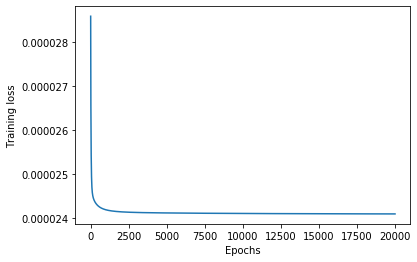

In [7]:
## Plotting the loss
ax = np.arange(len(loss))
plt.plot(ax,loss)
plt.xlabel("Epochs")
plt.ylabel("Training loss")
plt.show()

In [8]:
# Normalization of test set
x_test = np.empty(x_test1.shape)
for i in range(0,x_test1.shape[1]):
    x_test[:,i] = x_test1[:,i] - m[i]*np.ones(x_test1[:,i].shape)
    x_test[:,i] = x_test[:,i]/v[i]

In [9]:
# Predicting
y_hat = x_test@w
# Denormalising prediction
y_hat = y_hat*v1
y_hat = y_hat+m1

In [10]:
loss_te = np.mean((y_test-y_hat)**2)
print("Testing MSE after denormalising = ",loss_te)

Testing MSE after denormalising =  7782.049356361749
